<a href="https://www.kaggle.com/code/yannicksteph/rsna-miccai-brain-tumor-classification?scriptVersionId=132089159" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/yannicksteph/rsna-miccai-brain-tumor-classification" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚧 Work in progress 🚧 #

**<center><font size=5>RSNA-MICCAI Brain Tumor Classification</font></center>**

<center><img src="https://lingualab.ca/fr/project/language-recovery-psa/featured_hu67ab33455cf328a3b8dbb37d23762824_484672_720x0_resize_lanczos_2.png" alt="equal-2495950-1920" border="0" width="700"></center>

****

# 🚧 TODO Na pas oublier de mettre les sections ⚠️

**Table of Contents**
- <a href='#overview'>1. Project overview and objectives</a> 
    - <a href='#contributors'>1.1. Contributors</a>
    - <a href='#dataset_overview'>1.2. Data overview</a>
    - <a href='#definitions'>1.3. Imports, Methods, Paths, Reading definitions</a>
- <a href='#exploratory_data'>2. Exploratory Data</a>
    - <a href='#exploratory_data_2_1'>2.1. MRI  scans folders</a>
    - <a href='#exploratory_data_2_2'>2.2. MRI slides scans previews</a>
    - <a href='#exploratory_data_2_3'>2.3. MRI and MGMT values previews</a>
- <a href='#brain_segmentation'>3. Brain segmentation</a>
    - <a href='#brain_segmentation_3_1'>3.1. Importance of Brain Segmentation</a>
    - <a href='#brain_segmentation_3_2'>3.2. Selection Criteria</a>
    - <a href='#brain_segmentation_3_3'>3.3. Contributions of the Library</a>
- <a href='#utilizing_unet_4'>4. Utilizing the U-Net for Brain MRI Model and RadiomicsShape2D Class</a>
    - <a href='#utilizing_unet_4_1'>4.1. Architecture</a>
    - <a href='#utilizing_unet_4_2'>4.2. Usage Instructions</a>
    - <a href='#utilizing_unet_4_3'>4.3. RadiomicsShape2D Class</a>
    - <a href='#utilizing_unet_4_4'>4.4. Usage Instructions</a>
- <a href='#dataset_creation_5'>5. Dataset creation</a>
- <a href='#exploratory_dataset'>6. Exploratory Dataset</a>
- <a href='#analysis'>7. Analysis Dataset</a>
    - <a href='#analysis_7_1'>7.1. Average Patient MGMT Comparison</a> 
    - <a href='#analysis_7_2'>7.2. Correlation Matrix</a> 
    - <a href='#analysis_7_3'>7.3. Univariate analysis</a>  
    - <a href='#analysis_7_4'>7.4. Bivariate analysis</a>           
- <a href='#clean_preprocessing_8'>8. Clean & Preprocessing</a>


****

# <a id='overview'>1. Project overview and objectives</a>

### Overview:

A malignant brain tumor is a life-threatening condition, specifically glioblastoma, which is the most common and has the poorest prognosis among adult brain cancers, with a median survival of less than a year. The presence of a specific genetic sequence called MGMT promoter methylation in the tumor has been identified as a favorable prognostic factor and a strong predictor of chemotherapy responsiveness.

Currently, the genetic analysis of cancer requires a surgical procedure to obtain a tissue sample, followed by a time-consuming process of determining the genetic characteristics of the tumor, which can take several weeks. Depending on the results and the chosen initial treatment, additional surgeries may be necessary. Developing an accurate method to predict the genetic profile of the cancer solely through imaging (known as radiogenomics) would potentially reduce the number of surgeries and allow for a more tailored therapy approach.

The Radiological Society of North America (RSNA) and the Medical Image Computing and Computer Assisted Intervention Society (MICCAI Society) have collaborated to enhance the diagnosis and treatment planning for glioblastoma patients.

### Competition:

In this competition, participants are tasked with using MRI (magnetic resonance imaging) scans to train and test a model that can predict the genetic subtype of glioblastoma by detecting the presence of MGMT promoter methylation.

Successful outcomes from this competition could significantly contribute to less invasive diagnoses and treatments for brain cancer patients. Introducing new and personalized treatment strategies before surgery holds the potential to improve the management, survival rates, and overall prospects of individuals affected by brain cancer.

### Acknowledgments:

The Radiological Society of North America (RSNA®) is a non-profit organization representing 31 radiologic subspecialties from 145 countries worldwide. RSNA promotes excellence in patient care and healthcare delivery through education, research, and technological innovation.

RSNA provides high-quality educational resources, publishes five top peer-reviewed journals, hosts the world's largest radiology conference, and is dedicated to shaping the future of the profession through the RSNA Research & Education (R&E) Foundation, which has funded $66 million in grants since its establishment. Additionally, RSNA actively supports and facilitates research in medical imaging artificial intelligence (AI) by sponsoring ongoing AI challenge competitions.

The Medical Image Computing and Computer Assisted Intervention Society (MICCAI Society) is committed to advancing research, education, and practice in the field of medical image computing, computer-assisted interventions, biomedical imaging, and medical robotics. The society achieves this objective by organizing high-quality international conferences, workshops, tutorials, and publications that promote the exchange and dissemination of advanced knowledge, expertise, and experiences produced by leading institutions, scientists, physicians, and educators worldwide.

A complete list of acknowledgments can be found on this page.

[RSNA-MICCAI Brain Tumor Radiogenomic Classification](https://www.kaggle.com/competitions/rsna-miccai-brain-tumor-radiogenomic-classification/data?select=train_labels.csv)

## <a id='contributors'>1.1. Contributors</a>

- [David Goudard](https://www.kaggle.com/goudgoud)
- [Louis-Marie Renaud](https://www.kaggle.com/louismarierenaud)
- [Yannick Stephan](https://github.com/YanSteph)

## <a id='dataset_overview'>1.2. Data overview</a>

The dataset we will be working with consists of MRI data provided by the Radiological Society of North America (RSNA®) and the Medical Imaging Computation and Computer Assistance Society (MICCAI Society). The images are provided in DICOM format and are accompanied by a CSV file containing radiomic features extracted from the images.

The **"train/"** directory contains the training files with the **"train_labels.csv"**

The **"test/"** directory contains the tests files for the competition with the **"sample_submission.csv"**

The files are mpMRI scans, this includes:
- Fluid Attenuated Inversion Recovery (FLAIR)
    * What it is: These are images that detect brain abnormalities, such as edema and inflammatory lesions. These images are sensitive to the detection of anomalies related to inflammatory and infectious diseases of the central nervous system.
    * What it highlights: It helps to detect anomalies in the brain that might not be visible in other MRI sequences.
    * These images allow for the detection of brain abnormalities related to inflammatory and infectious diseases of the central nervous system.
- T1-weighted pre-contrast (T1w)
    * What it is: These are images that highlight soft tissues, such as muscles and nerves, and are useful for visualizing normal brain structures.
    * What it highlights: It allows the visualization of the normal brain structures and also helps in the detection of tumors and lesions.
    * These images allow for the detection of brain tumors and lesions.
- T1-weighted post-contrast (T1Gd)
    * What it is: These are images that use a contrast agent to detect vascular anomalies, such as tumors and lesions, which are more visible after contrast agent administration.
    * What it highlights: It enhances the visibility of vascular anomalies, such as tumors and lesions, making it easier to detect them.
    * These images allow for the detection of vascular anomalies, such as tumors and lesions.
- T2-weighted (T2)
    * What it is: These images detect abnormalities related to demyelination, such as multiple sclerosis, as well as brain tumors and lesions.
    * What it highlights: It helps in the detection of anomalies related to cerebrospinal fluid, such as cysts and brain tumors.
    * These images allow for the detection of anomalies related to demyelination, brain tumors, lesions, and cerebrospinal fluid.

## <a id='definitions'>1.3. Imports, Methods, Paths, Reading definitions</a>

### Imports

In [1]:
# Operating System and File System
import os 

# Basic
import math
from enum import Enum
from itertools import chain

# Data Manipulation and Analysis
import numpy as np  
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt 
# Animation Matplotlib
import matplotlib.animation as anim
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# Warnings
import warnings  # For suppressing warnings

# JSON Handling
import json  # For working with JSON data

# Encoding and Decoding Binary Data
import base64  # For encoding and decoding binary data

# Interactive Widgets and Display
import ipywidgets as widgets  # For creating interactive widgets in Jupyter Notebook
from IPython.display import HTML, display  # For displaying HTML content
from IPython.display import Image as show_gif # GIF

# Deep Learning Framework
import torch  # For working with PyTorch deep learning framework

# DICOM File Handling
import pydicom  # For reading DICOM files
from pydicom import dcmread  # For reading DICOM files

# Image Processing and Filtering
import SimpleITK as sitk  # For image filtering
from PIL import Image  # For image processing using the Python Imaging Library (PIL)

# Machine Learning and Data Splitting
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm

import itertools  
from itertools import permutations

# Additional Libraries
import glob # Fetch data recusif
!pip install pyradiomics > /dev/null  # Installing the pyradiomics library for radiomics feature extraction
import radiomics  # For extracting radiomics features from medical images

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Paths

In [2]:
# ------------------------------------#    
# Definition Version
# ------------------------------------#    

class DatasetVersion(Enum):
    V_2D = '2D'
    V_3D = '3D'
    
# ------------------------------------#  
# Paths
# ------------------------------------#  
    
# ------------#
# Folders
# ------------# 
base_folder_path = "../input/rsna-miccai-brain-tumor-radiogenomic-classification/"
train_folder_path = f"{base_folder_path}train/"
dataset_folder_path = "../input/githut-rsna-miccai-brain-tumor-classification-ai/dataset/"

# ------------#
# Train / files
# ------------# 
train_labels_path = f"{base_folder_path}train_labels.csv"
submission_labels_path = f"{base_folder_path}sample_submission.csv"

dataset_3d_path = f"{dataset_folder_path}3d_rsna_miccai_brain_tumor_brain_segmentation_pytorch_unet.csv"
dataset_2d_path = f"{dataset_folder_path}2d_rsna_miccai_brain_tumor_brain_segmentation_pytorch_unet.csv"

### Configure

#### **ℹ️ Configuration:**

- Flag to skip brain segmentation with PyTorch UNet
- Flag to set the dataset version 2D or 2D

👇🏻

In [3]:
# ------------------------------------#   
# Configuration
# ------------------------------------#    
    
# ℹ️ Flag to skip brain segmentation with PyTorch UNet
# If set to True, we will import the dataset that has already been generated
skip_brain_segmentation_pytorch_unet = True

# ℹ️ Set the dataset version to use when <skip_brain_segmentation_pytorch_unet = True>
dataset_version =  DatasetVersion.V_3D

# ------------------------------------#
# Configuration options
# ------------------------------------#

# Show all columns
pd.set_option('display.max_columns', None)
# Suppressing Warnings
warnings.filterwarnings('ignore')

# Define "reader"
# Read serie of image files into a SimpleTK image
sitk_reader = sitk.ImageSeriesReader()
sitk_reader.LoadPrivateTagsOn()

# Suppressing warnings SimpleITK
sitk.ProcessObject.SetGlobalWarningDisplay(False)

# ------------
# Segmentation
# ------------

# Load mateuszbuda/brain-segmentation-pytorch, U-Net with batch normalization for biomedical image segmentation with pretrained weights for abnormality segmentation in brain MRI
segmentation_model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 
                                    'unet', 
                                    in_channels=3, 
                                    out_channels=1, 
                                    init_features=32, 
                                    pretrained=True, 
                                    trust_repo=True)

# ------------
# Dataset
# ------------
# Dataset of the project, explanation in next section.    
preview_dataset = pd.read_csv(train_labels_path)
dataset = pd.read_csv(dataset_3d_path if dataset_version == DatasetVersion.V_3D else dataset_2d_path)
samp_subm = pd.read_csv(submission_labels_path)

Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/releases/download/v1.0/unet-e012d006.pt" to /root/.cache/torch/hub/checkpoints/unet-e012d006.pt


### Methods

In [4]:
# ===============================================
# Base methods
# ===============================================

def is_even(nombre):
    return nombre % 2 == 0

def map_dataframe_to_tuples(df, columns):
    mapped_tuples = []
    for row in df.itertuples(index=False):
        mapped_tuple = tuple(getattr(row, col) for col in columns)
        mapped_tuples.append(mapped_tuple)
    return mapped_tuples
    
# ===============================================
# Images methods
# ===============================================

def get_processed_image(patient_id, dataset_version):
    """
    Retrieves and processes the images for a given patient, grouping them for segmentation.

    Args:
        patient_id (str): The ID of the patient (BraTS21ID).

    Returns:
        numpy.ndarray: A processed image composed of the different images of the patient.
    """
    # SEGMENTATION MODEL LIMITED TO 3 LAYERS
    # T2W SKIPPED
    patient_id = int(patient_id)

    # Paths for image sequences
    t1w_path = f'{train_folder_path}/{str(patient_id).zfill(5)}/T1w'
    t2w_path = f'{train_folder_path}/{str(patient_id).zfill(5)}/T2w'
    
    flair_path = f'{train_folder_path}/{str(patient_id).zfill(5)}/FLAIR'
    t1wce_path = f'{train_folder_path}/{str(patient_id).zfill(5)}/T1wCE'

    # Retrieve image sequences
    if dataset_version == DatasetVersion.V_2D:
        t1w_image = sequence_filenames(t1w_path)
        flair_image = sequence_filenames(flair_path)
        t1wce_image = sequence_filenames(t1wce_path)
        t2w_image = None
    else:
        t1w_image = sequence_filenames(t1w_path)
        flair_image = sequence_filenames(flair_path)
        t1wce_image = sequence_filenames(t1wce_path)
        t2w_image = None
        
    # Resampling
    if dataset_version == DatasetVersion.V_2D:
        re_sampled_flair = re_sample_image(flair_image, t1w_image)
        re_sampled_t1wce = re_sample_image(t1wce_image, t1w_image)
        t2w_array = None
    else:
        re_sampled_flair = re_sample_image(flair_image, t1w_image)
        re_sampled_t1wce = re_sample_image(t1wce_image, t1w_image)
        t2w_array = None

    
    

    # Normalization
    if dataset_version == DatasetVersion.V_2D:
        t1w_array = normalize(sitk.GetArrayFromImage(t1w_image))
        re_sampled_flair_array = normalize(sitk.GetArrayFromImage(re_sampled_flair))
        re_sampled_t1wce_array = normalize(sitk.GetArrayFromImage(re_sampled_t1wce))
        re_sampled_t2w_array = None
    else:
        t1w_array = normalize(sitk.GetArrayFromImage(t1w_image))
        re_sampled_flair_array = normalize(sitk.GetArrayFromImage(re_sampled_flair))
        re_sampled_t1wce_array = normalize(sitk.GetArrayFromImage(re_sampled_t1wce))
        re_sampled_t2w_array = None

    # Stack sequences
    if dataset_version == DatasetVersion.V_2D:
        sequence_stacked = np.stack([t1w_array, re_sampled_flair_array, re_sampled_t1wce_array])
        central_slice = t1w_array.shape[0] // 2
    else:
        sequence_stacked = np.stack([t1w_array, re_sampled_flair_array, re_sampled_t1wce_array])
        central_slice = t1w_array.shape[0] // 2

    rvb = sequence_stacked[:, central_slice, :, :].transpose(1, 2, 0)
    image = Image.fromarray((rvb * 255).astype(np.uint8))
    return np.array([np.moveaxis(np.array(image.resize((256, 256))), -1, 0)])


    
def sequence_filenames(path) :
    """
    Retrieves a sequence of images for a given directory.

    Args:
        path (str): The path to the directory containing the DICOM data set.

    Returns:
        SimpleITK.Image: A sequence of images corresponding to the DICOM files in the directory.

    Raises:
        FileNotFoundError: If the specified path does not exist.
    """
    filenames = sitk_reader.GetGDCMSeriesFileNames(path)
    sitk_reader.SetFileNames(filenames)
    image = sitk_reader.Execute()
    
    return image    

def normalize(dataset) :
    """
    Normalizes the data obtained from the images.

    Args:
        dataset (numpy.ndarray): The dataset to be normalized.

    Returns:
        numpy.ndarray: The normalized dataset.
    """
    return (dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset))


def re_sample_image(image, ref_img):
    """
    Resamples the image to match the dimensions and properties of the reference image.

    Args:
        image (SimpleITK.Image): The image to be resampled.
        ref_img (SimpleITK.Image): The reference image used for resampling.

    Returns:
        SimpleITK.Image: The resampled image.
    """
    re_sampler = sitk.ResampleImageFilter()
    re_sampler.SetReferenceImage(ref_img)
    re_sampler.SetDefaultPixelValue(image.GetPixelIDValue())
    re_sampler.SetInterpolator(sitk.sitkLinear)
    re_sampler.SetOutputSpacing(ref_img.GetSpacing())
    re_sampler.SetOutputDirection(ref_img.GetDirection())
    re_sampler.SetOutputOrigin(ref_img.GetOrigin())
    re_sampler.SetSize(ref_img.GetSize())
    re_sampler.SetTransform(sitk.AffineTransform(image.GetDimension()))
    re_sampled_image = re_sampler.Execute(image)
    
    return re_sampled_image

def segmentation_process(image_resized):
    """
    Obtains the segmented image.

    Args:
        image_resized (numpy.ndarray): The resized image.

    Returns:
        numpy.ndarray: The segmented image.
    """
    segmentation = segmentation_model(torch.Tensor(image_resized))
    return segmentation
    
# ===============================================
# Dataset creation methods
# ===============================================

def init_dataset_radiomics() :
    """
    Initializes the DataFrame structures for radiomics data acquisition.

    Returns:
        None
    """
    global df_shapes
    global df_textures
    global df_first_orders_features
    
    if dataset_version == DatasetVersion.V_3D:
        df_shapes_columns = ['ID','BraTS21ID','MeshVolume','VoxelVolume','SurfaceArea','SurfaceVolumeRatio','Sphericity',
                             'Compactness1','Compactness2','SphericalDisproportion','Maximum3DDiameter','Maximum2DDiameterRow',
                             'Maximum2DDiameterColumn','MajorAxisLength','MinorAxisLenth','LeastAxisLength','Elongation','Flatness']

    else :
        df_shapes_columns = ['ID','BraTS21ID','MeshSurface','PixelSurface','Perimeter','PerimeterSurfaceRatio','Sphericity',
                             'SphericalDisproportion','MaximumDiameter','MajorAxisLength','MinorAxisLenth','Elongation']

    
    df_shapes = pd.DataFrame(columns=df_shapes_columns) 


    df_textures_columns = ['ID','Autocorrelation', 'ClusterProminence', 'ClusterShade', 'ClusterTendency', 'Contrast', 
                           'Correlation', 'DifferenceAverage', 'DifferenceEntropy', 'DifferenceVariance', 'Id', 'Idm', 
                           'Idmn', 'Idn', 'Imc1', 'Imc2', 'InverseVariance', 'JointAverage', 'JointEnergy', 'JointEntropy', 
                           'MCC', 'MaximumProbability', 'SumAverage', 'SumEntropy', 'SumSquares']
    df_textures = pd.DataFrame(columns=df_textures_columns) 


    df_first_orders_features_columns=['ID','10Percentile', '90Percentile', 'Energy', 'Entropy', 'InterquartileRange', 'Kurtosis', 
                                      'Maximum', 'MeanAbsoluteDeviation', 'Mean', 'Median', 'Minimum', 'Range', 'RobustMeanAbsoluteDeviation', 
                                      'RootMeanSquared', 'Skewness', 'TotalEnergy', 'Uniformity', 'Variance']
    df_first_orders_features = pd.DataFrame(columns=df_first_orders_features_columns) 
    

def add_patient_data2D(ID,img_resized,segmentation) :
    """
    Adds data from the specified patient's images to the analysis dataset.

    Args:
        ID (int): The ID of the patient.
        img_resized (numpy.ndarray): Resized image of the patient.
        segmentation (torch.Tensor): Segmentation of the patient's image.

    Returns:
        None
    """
    global df_shapes
    global df_textures
    global df_first_orders_features
    
    # shape
    results = radiomics.shape2D.RadiomicsShape2D(
        sitk.GetImageFromArray(img_resized), 
        sitk.GetImageFromArray(np.array([
            segmentation[0][0].detach().cpu().numpy() > 0.5
        ]).astype(np.uint8)),
        force2D=True
    )
    
    shape2D = {}
    shape2D['ID'] = int(ID)
    shape2D['BraTS21ID'] = int(ID)
    shape2D['MeshSurface'] = results.getMeshSurfaceFeatureValue()
    shape2D['PixelSurface'] = results.getPixelSurfaceFeatureValue()
    shape2D['Perimeter'] = results.getPerimeterFeatureValue()
    shape2D['PerimeterSurfaceRatio'] = results.getPerimeterSurfaceRatioFeatureValue()
    shape2D['Sphericity'] = results.getSphericityFeatureValue()
    shape2D['SphericalDisproportion'] = results.getSphericalDisproportionFeatureValue()
    shape2D['MaximumDiameter'] = results.getMaximumDiameterFeatureValue()
    shape2D['MajorAxisLength'] = results.getMajorAxisLengthFeatureValue()
    shape2D['MinorAxisLenth'] = results.getMinorAxisLengthFeatureValue()
    shape2D['Elongation'] = results.getElongationFeatureValue()
    
    df_shapes=df_shapes.append(shape2D,ignore_index=True)
    
    # GLCM
    results=radiomics.glcm.RadiomicsGLCM(
        sitk.GetImageFromArray(img_resized[0,0,:,:].reshape(1, 256, 256)), 
        sitk.GetImageFromArray(np.array([
            segmentation[0][0].detach().cpu().numpy() > 0.5
        ]).astype(np.uint8)),
        force2D=True
    )

    results.enableAllFeatures()
    res = results.execute()
    res['ID']=int(ID)

    df_textures=df_textures.append(res,ignore_index=True)
    
    # First-orders features
    results =  radiomics.firstorder.RadiomicsFirstOrder(
        sitk.GetImageFromArray(img_resized[0,0,:,:].reshape(1, 256, 256)), 
        sitk.GetImageFromArray(np.array([
            segmentation[0][0].detach().cpu().numpy() > 0.5
        ]).astype(np.uint8)),
        force2D=True
    )

    results.enableAllFeatures()
    res = results.execute()
    res['ID']=int(ID)

    df_first_orders_features=df_first_orders_features.append(res,ignore_index=True)
    

def add_patient_data3D(ID,img_resized,segmentation) :
    """
    Adds data from the specified patient's images to the analysis dataset.

    Args:
        ID (int): The ID of the patient.
        img_resized (numpy.ndarray): Resized image of the patient.
        segmentation (torch.Tensor): Segmentation of the patient's image.

    Returns:
        None
    """
    global df_shapes
    global df_textures
    global df_first_orders_features
    
    # shape
    results = radiomics.shape.RadiomicsShape(
        sitk.GetImageFromArray(img_resized), 
        sitk.GetImageFromArray(np.array([
            segmentation[0][0].detach().cpu().numpy() > 0.5
        ]).astype(np.uint8))#,
        #force2D=True
    )
    
    shape3D = {}
    shape3D['ID'] = int(ID)
    shape3D['BraTS21ID'] = int(ID)
    shape3D['MeshVolume'] = results.getMeshVolumeFeatureValue()
    shape3D['VoxelVolume'] = results.getVoxelVolumeFeatureValue()
    shape3D['SurfaceArea'] = results.getSurfaceAreaFeatureValue()
    shape3D['SurfaceVolumeRatio']=results.getSurfaceVolumeRatioFeatureValue()
    shape3D['Sphericity'] = results.getSphericityFeatureValue()
    shape3D['Compactness1']=results.getCompactness1FeatureValue()
    shape3D['Compactness2']=results.getCompactness2FeatureValue()
    shape3D['SphericalDisproportion']=results.getSphericalDisproportionFeatureValue()
    shape3D['Maximum3DDiameter']=results.getMaximum3DDiameterFeatureValue()
    shape3D['Maximum2DDiameterRow']=results.getMaximum2DDiameterRowFeatureValue()
    shape3D['Maximum2DDiameterColumn']=results.getMaximum2DDiameterColumnFeatureValue()
    shape3D['MajorAxisLength'] = results.getMajorAxisLengthFeatureValue()
    shape3D['MinorAxisLenth'] = results.getMinorAxisLengthFeatureValue()
    shape3D['LeastAxisLength'] = results.getLeastAxisLengthFeatureValue()
    shape3D['Elongation'] = results.getElongationFeatureValue()
    shape3D['Flatness'] = results.getFlatnessFeatureValue()
  
    df_shapes=df_shapes.append(shape3D,ignore_index=True)
    
    # GLCM
    results=radiomics.glcm.RadiomicsGLCM(
        sitk.GetImageFromArray(img_resized[0,0,:,:].reshape(1, 256, 256)), 
        sitk.GetImageFromArray(np.array([
            segmentation[0][0].detach().cpu().numpy() > 0.5
        ]).astype(np.uint8))#,
        #force2D=True
    )

    results.enableAllFeatures()
    res = results.execute()
    res['ID']=int(ID)

    df_textures=df_textures.append(res,ignore_index=True)
    
    # First-orders features
    results =  radiomics.firstorder.RadiomicsFirstOrder(
        sitk.GetImageFromArray(img_resized[0,0,:,:].reshape(1, 256, 256)), 
        sitk.GetImageFromArray(np.array([
            segmentation[0][0].detach().cpu().numpy() > 0.5
        ]).astype(np.uint8))#,
        #force2D=True
    )

    results.enableAllFeatures()
    res = results.execute()
    res['ID']=int(ID)

    df_first_orders_features=df_first_orders_features.append(res,ignore_index=True)    

    
# ===============================================
# Show methods
# ===============================================
    
def show_brain_segmentation(patient_id_mgmt_tuple_list, dataset_version):
    """
    Display a preview of patients from the given dataset.

    Args:
        patient_id_mgmt_tuples (list): List of tuples containing patient IDs and MGMT values. (Id, MGMT)
        dataset_version (str): Version of the dataset (2D or 3D).
    """
    # Loading
    loading_max = len(patient_id_mgmt_tuple_list)
    progress_bar = widgets.IntProgress(min=0, max=loading_max, description='Processing patients:', bar_style='info')
    display(progress_bar)

    # Process and display images for each patient
    for i, patient_id_mgmt_value in enumerate(patient_id_mgmt_tuple_list, start=1):
        # Process images for patient with MGMT value
        patient_id = patient_id_mgmt_value[0]
        patient_mgmt = patient_id_mgmt_value[1]
        img_resized = get_processed_image(patient_id, dataset_version)
        segmentation = segmentation_process(img_resized)
        show_segmentation(f"Patient {patient_id} and MGMT = {patient_mgmt}", img_resized, dataset_version, segmentation)
        progress_bar.value = i + 1

    progress_bar.close()
    
def show_segmentation(title, img_src, dataset_version, segmentation):
    """
    Displays the resized source images and the segmentation image in a single line.

    Args:
        title (str): Global title for the plot.
        img_src (numpy.ndarray): Resized source images.
        segmentation (torch.Tensor): Segmentation image.

    Returns:
        None
    """
    if dataset_version == DatasetVersion.V_3D:
        titles = ['FLAIR', 'T1wce', 'T2w' ] # T1wce
        
    else:
        titles = ['T1w', 'FLAIR', 'T1wce'] # T2w
        
    # Create the main figure
    fig = plt.figure()

    # Adjust top margin for the main figure
    fig.subplots_adjust(top=0.85)

    # Set the global title
    fig.suptitle(title, y=0.75)

    # Iterate over the source images
    for i in range(3):
        ax = fig.add_subplot(1, 4, 1+i)
        ax.imshow(img_src[0, i])
        ax.set_title(titles[i])
        ax.set_xticks([])
        ax.set_yticks([])

    # Add the segmentation image
    ax_segmentation = fig.add_subplot(1, 4, 4)
    ax_segmentation.imshow(segmentation.detach().numpy()[0, 0])
    ax_segmentation.set_title('Segmentation')
    ax_segmentation.set_xticks([])
    ax_segmentation.set_yticks([])

    plt.tight_layout()
    plt.show()
    
    
def show_download_link(df, title = "Download CSV file", filename = "data.csv"):
    """
    Displays a download link for a DataFrame as a CSV file.

    Args:
        df (pandas.DataFrame): The DataFrame to be downloaded.
        title (str): The title of the download link (default: "Download CSV file").
        filename (str): The name of the downloaded file (default: "data.csv").

    Returns:
        None
    """
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload, title=title, filename=filename)
    display(HTML(html))
    
    
def show_test_normality(df,graphic=True) : 

    describe = df.describe()
    
    for col in df.columns :

        skewness = stats.skew(df[col])
        kurtosis = stats.kurtosis(df[col],fisher=False)
        excess_kurtosis = stats.kurtosis(df[col])
        describe.loc['skewness',col] =  0.000001 if skewness == 0 else skewness
        describe.loc['kurtosis', col] =  0.000001 if kurtosis == 0 else kurtosis
        describe.loc['excess_kurtosis',col] =  0.000001 if excess_kurtosis == 0 else excess_kurtosis
        shapiro_test =  stats.shapiro(df[col])[1]
        describe.loc['shapiro_test',col] = shapiro_test
        describe.loc['normalite',col] = 'Oui' if shapiro_test > 0.05 else 'Non'

        if graphic : 
            figure_size = (6, 2)

            fig = plt.figure(figsize=figure_size)

            plt.subplot(1,3,1)
            sns.histplot(df[col], kde=True)
            plt.title('Histogramme de {}'.format(col),fontsize=8)
            plt.xlabel('Valeur',fontsize=7)
            plt.ylabel('Fréquence',fontsize=7)
            plt.plot(describe.loc['mean',col],0, marker="o", color="red")

            plt.subplot(1,3,2)
            plt.boxplot(x=df[col])
            plt.title('Boxplot de {}'.format(col),fontsize=8)
            #plt.xlabel('Valeur')

            plt.subplot(1,3,3)
            stats.probplot(df[col], plot=plt)
            plt.title('Q-Q plot pour {}'.format(col),fontsize=8)
            plt.xlabel('Quantile théorique',fontsize=7)
            plt.ylabel('Valeurs ordonnées',fontsize=7)
            plt.tight_layout()
            plt.show()

    return describe

def show_3D_scatter_plots(combinations_party, dataset, figsize=(14, 25), elev_angle=30, azimuth_angle=15):
    """
    Display 3D scatter plots for each combination of variables in combinations_party using the given dataset.
    
    Args:
        combinations_party (list): List of combinations of variables to plot.
        dataset (DataFrame): The dataset containing the variables.
        figsize (tuple, optional): Figure size in inches. Defaults to (14, 25).
        elev_angle (float, optional): Elevation angle in degrees. Defaults to 30.
        azimuth_angle (float, optional): Azimuth angle in degrees. Defaults to 15.
    """
    num_combinations = len(combinations_party)
    num_rows = int(math.ceil(num_combinations / 2))
    num_cols = min(2, num_combinations)

    fig, axes = plt.subplots(num_rows, num_cols, subplot_kw={'projection': '3d'}, figsize=figsize)

    # Loop to create scatter plots for each combination
    for i, combo in enumerate(combinations_party):
        if num_combinations == 1:
            ax = axes
        elif num_rows == 1:
            ax = axes[i]
        else:
            row = i // num_cols
            col = i % num_cols
            ax = axes[row, col]

        x = dataset[combo[0]]
        y = dataset[combo[1]]
        z = dataset[combo[2]]
        c = dataset['MGMT_value']

        # Display 3D scatter plot
        scatter = ax.scatter(x, y, z, c=c, cmap='coolwarm')

        # Add labels to axes
        ax.set_xlabel(combo[0])
        ax.set_ylabel(combo[1])
        ax.set_zlabel(combo[2])
        ax.view_init(elev=elev_angle, azim=azimuth_angle)
        title = combo[0] + " with " + combo[1] + " and " + combo[2]
        scatter.set_label(title)

    # Hide the last subplot if the number of combinations is odd
    if num_combinations % 2 == 1:
        axes[num_rows-1, num_cols-1].axis('off')

    fig.tight_layout()
    plt.show()
    plt.close()



# ===============================================
# Analysis
# ===============================================

def filter_correlation_matrix(correlation_matrix, correlation_threshold):
    """
    Filters a correlation matrix by keeping only the absolute values greater than or equal to the correlation threshold.

    Args:
        correlation_matrix (pd.DataFrame): The correlation matrix.
        correlation_threshold (float): The correlation threshold for filtering the matrix.

    Returns:
        pd.DataFrame: The filtered correlation matrix.

    """
    filtered_correlation_matrix = correlation_matrix.copy()
    filtered_correlation_matrix[abs(filtered_correlation_matrix) < correlation_threshold] = np.nan

    return filtered_correlation_matrix


def find_highly_correlated_groups(correlation_matrix, correlation_threshold = 0.8, filter_duplicated_group = True, convert_indices_to_column_names = True):
    """
    Finds groups of highly correlated variables from a correlation matrix.

    Args:
        correlation_matrix (pd.DataFrame): The correlation matrix.
        correlation_threshold (float): The correlation threshold to consider as highly correlated.
        filter_duplicated_group (bool): Indicates whether to filter out duplicated values in the correlated groups.
        convert_indices_to_column_names (bool): Indicates whether to convert indices to column names.

    Returns:
        List[List[str]]: A list of groups, where each group contains the names of variables that are highly correlated.

    """
    n = correlation_matrix.shape[0]  # Number of variables in the correlation matrix
    groups_correlated = []  # List to store the correlated groups
    
    # Retrieve column names
    column_names = correlation_matrix.columns
    
    # Traverse each variable
    for i in range(n):
        if column_names[i] not in [column_names[v] for g in groups_correlated for v in g]:  # Check if the variable has already been added to a group
            group = [i]  # Create a new group containing the current variable (i)
            for j in range(i+1, n):
                if column_names[j] not in [column_names[v] for g in groups_correlated for v in g]:  # Check if the variable has already been added to a group
                    correlation = correlation_matrix.iloc[i, j]  # Retrieve the correlation between variables i and j
                    if abs(correlation) >= correlation_threshold:  # Strong correlation condition (adjust as needed)
                        group.append(j)  # Add variable j to the group
            
            groups_correlated.append(group)  # Add the group to the list of correlated groups
    
    # Filter out duplicated values in the correlated groups
    if filter_duplicated_group:
        filtered_groups_correlated = []
        for group in groups_correlated:
            filtered_group = list(set(group))  # Convert to a set to eliminate duplicates, then convert back to a list
            filtered_groups_correlated.append(filtered_group)
        groups_correlated = filtered_groups_correlated # Reset by new one
    
    # Convert indices to column names
    if convert_indices_to_column_names:
        groups_correlated = [[column_names[i] for i in group] for group in groups_correlated]
    
    return groups_correlated

<hr>

# <a id='exploratory_data'>2. Exploratory Data</a>

The **"train/"** directory contains the training files for the competition. Each top-level directory represents a subject, and the **"train_labels.csv"** file contains the corresponding targets for each subject, indicating the presence of MGMT promoter methylation.

### ℹ️ **Note**: 
However, report on main contest page, there are unexpected problems with the following three cases in the training dataset: [00109, 00123, 00709].

In [60]:
total = len(preview_dataset)  # Nombre total d'échantillons
title = "Total number of files"
data = {title: [total]}

df = pd.DataFrame(data)
df.set_index(title, inplace=True)
df.head()

Empty DataFrame
Columns: []
Index: [585]

In [6]:
preview_dataset.head(10)

BraTS21ID  MGMT_value
0          0           1
1          2           1
2          3           0
3          5           1
4          6           1
5          8           1
6          9           0
7         11           1
8         12           1
9         14           1

The "train_labels.csv" file.

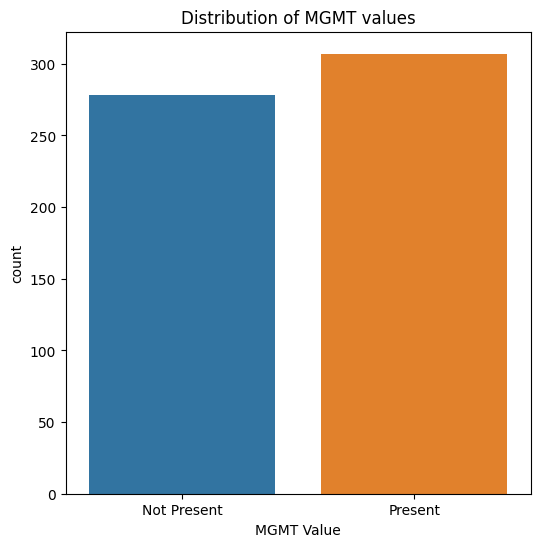

In [7]:
plt.figure(figsize=(6, 6))
sns.countplot(data=preview_dataset, x="MGMT_value")
plt.title("Distribution of MGMT values")
plt.xlabel("MGMT Value")
plt.xticks([0, 1], ["Not Present", "Present"])
plt.show()

The **"test/"** directory contains the test files. For each subject in the test data, there is no file containing the methylation targets, so these values must be predicted. The **"sample_submission.csv"** file is an example of a correctly formatted submission file, with MGMT values of **0.5** for each subject.

Overall, the task of the competition is to predict the presence of MGMT promoter methylation for each subject in the test data.

In [8]:
samp_subm.head(1)

BraTS21ID  MGMT_value
0          1         0.5

### ℹ️ **Note**:
We deduce that we have to separate the sets of given train into part two part train and test for training.

## <a id='exploratory_data_2_1'>2.1. MRI  scans folders</a>

In [61]:
first_folder = str(preview_dataset.loc[0, 'BraTS21ID']).zfill(5) + "/"
title = "Folders content for all patients"
# Folders content
folder_path = train_folder_path + first_folder  # Replace train_folder_path with the actual path
folder_content = os.listdir(folder_path)

df = pd.DataFrame({
        title: folder_content
    })
df.set_index(title, inplace=True)
df.head()

Empty DataFrame
Columns: []
Index: [T2w, T1wCE, T1w, FLAIR]

In the first Dataset of the patient, we will explore the images contained in ['T2w', 'T1wCE', 'T1w', 'FLAIR'] of the first patient.

In [62]:
first_folder = str(preview_dataset.loc[0, 'BraTS21ID']).zfill(5) + "/"
folder_path = train_folder_path + first_folder  # Replace train_folder_path with the actual path

title = 'Image Type'
flair_count = len(os.listdir(folder_path + 'FLAIR'))
t1w_count = len(os.listdir(folder_path + 'T1w'))
t1wce_count = len(os.listdir(folder_path + 'T1wCE'))
t2w_count = len(os.listdir(folder_path + 'T2w'))

data = {
    title: ['FLAIR', 'T1w', 'T1wCE', 'T2w'],
    'Count': [flair_count, t1w_count, t1wce_count, t2w_count]
}


df = pd.DataFrame(data)
df.set_index(title, inplace=True)


df.head()

Count
Image Type       
FLAIR         400
T1w            33
T1wCE         129
T2w           408

## <a id='exploratory_data_2_2'>2.2. MRI slides scans previews</a>

In [11]:
image_path = "https://github.com/YanSteph/RSNA-MICCAI-Brain-Tumor-Classification-AI/blob/main/img/scan1.png?raw=true"
html_code = f'<img src="{image_path}" style="width: 700px;" />'
display(HTML(html_code))

## <a id='exploratory_data_2_3'>2.3. MRI and MGMT values previews</a>

IntProgress(value=0, bar_style='info', description='Processing patients:', max=8)

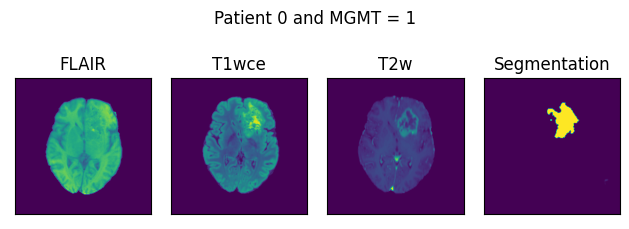

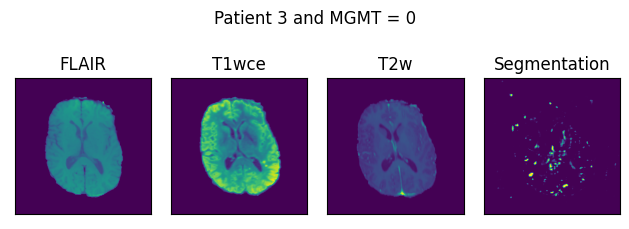

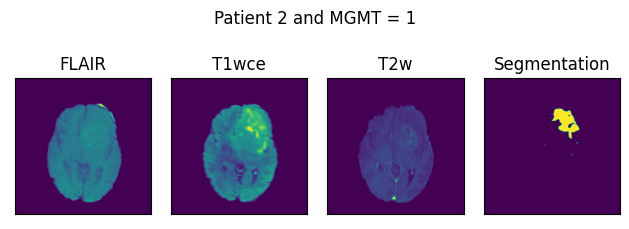

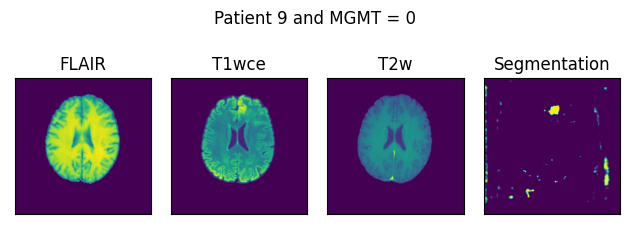

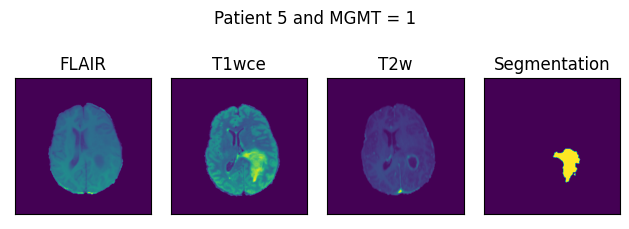

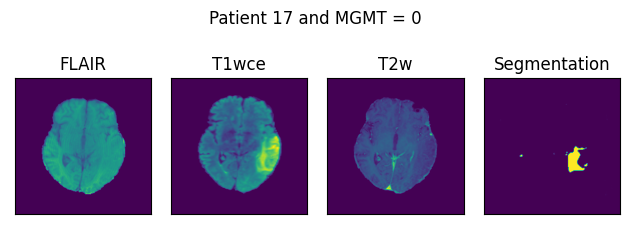

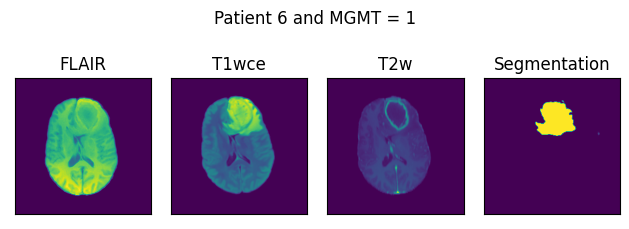

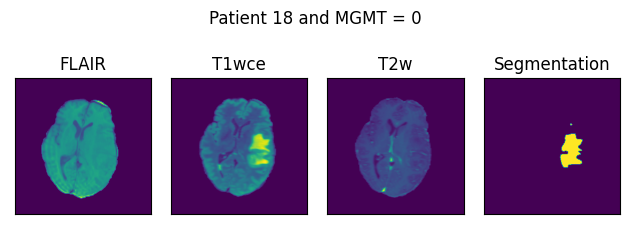

In [12]:
number_of_extraction = 4

# Filtre df mght 1 and 0
patient_without_mgmt = preview_dataset.loc[preview_dataset["MGMT_value"] == 0].sort_values('BraTS21ID')
patient_with_mgmt = preview_dataset.loc[preview_dataset["MGMT_value"] == 1].sort_values('BraTS21ID')

# Collonne selected
columns_to_map = ["BraTS21ID", "MGMT_value"]

# Collonne selected
patient_with_mgmt_folder_ids = patient_with_mgmt[columns_to_map].iloc[:number_of_extraction]
patient_without_mgmt_folder_ids = patient_without_mgmt[columns_to_map].iloc[:number_of_extraction]

# map df into tupple
patient_with_mgmt_mapped_tuples = map_dataframe_to_tuples(patient_with_mgmt_folder_ids, columns_to_map)
patient_without_mgmt_mapped_tuples = map_dataframe_to_tuples(patient_without_mgmt_folder_ids, columns_to_map)

patient_combined_with_and_without_mgmt_ids = list(chain.from_iterable(zip(patient_with_mgmt_mapped_tuples, patient_without_mgmt_mapped_tuples)))

show_brain_segmentation(patient_combined_with_and_without_mgmt_ids, dataset_version)

### ℹ️ **Note**: 

* We deduce that we have to separate the sets of given train into part two part train and test for training.
* Report on main contest page, there are unexpected problems with the following three cases in the training dataset: [00109, 00123, 00709], we exclude this data.
* Exclusion of "/test" folder.

----

# <a id='brain_segmentation'>3. Brain segmentation</a>
The "mateuszbuda_brain-segmentation-pytorch_unet" library was chosen to facilitate brain segmentation from medical images in our project. This section outlines the reasons behind selecting this library and its contribution to achieving accurate brain segmentation results.

Source: [mateuszbuda_brain-segmentation-pytorch_unet on PyTorch Hub](https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/)

## <a id='brain_segmentation_3_1'>3.1. Importance of Brain Segmentation</a>
Brain segmentation is a crucial task in medical imaging as it enables the extraction of precise information about different regions or classes within the brain structures. Accurate segmentation plays a vital role in various medical applications, including tumor detection, anatomical analysis, and treatment planning.

## <a id='brain_segmentation_3_2'>3.2. Selection Criteria</a>
The "mateuszbuda_brain-segmentation-pytorch_unet" library was chosen based on the following criteria:

* Exceptional Performance: The library has demonstrated exceptional performance in brain segmentation tasks, providing accurate and reliable results.
Unet Architecture: It is specifically designed based on the Unet neural network architecture, which has a proven track record of success in biomedical image segmentation.
* User-Friendly Nature: The library offers a user-friendly interface and efficient implementation, allowing researchers and practitioners to easily integrate it into their projects.

## <a id='brain_segmentation_3_3'>3.3. Contributions of the Library</a>
The utilization of the "mateuszbuda_brain-segmentation-pytorch_unet" library significantly contributed to the acquisition of accurate brain segmentation data for our dataset. By leveraging the library's capabilities, we were able to efficiently segment medical images and extract valuable information for further analysis and research purposes.

### ℹ️ **Note**: 

In summary, the selection of the "mateuszbuda_brain-segmentation-pytorch_unet" library was based on its exceptional performance, user-friendly nature, and utilization of the powerful Unet architecture. This library played a pivotal role in achieving accurate brain segmentation results and provided a solid foundation for our project's objectives.

# 🚧 TODO to edit If we switch to 3D 
# <a id='utilizing_unet_4'>4. Utilizing the U-Net for Brain MRI Model and RadiomicsShape2D Class</a>
U-Net for Brain MRI Model
To accomplish tumor segmentation, we will employ the U-Net for Brain MRI model. This section provides an overview of the model's architecture and usage instructions.

## <a id='utilizing_unet_4_1'>4.1. Architecture</a>
The U-Net for Brain MRI model features a U-shaped architecture with branch connections and consists of four levels of blocks. Each block comprises two convolution layers with batch normalization, ReLU activation function, and an encoding part with a max pooling layer. The decoding part utilizes up-convolution. The number of convolution filters varies across the model's levels, ranging from 32 to 256.

## <a id='utilizing_unet_4_2'>4.2. Usage Instructions</a>
To utilize the U-Net for Brain MRI model, follow these steps:

Provide an input brain MRI image with three channels corresponding to pre-contrast, FLAIR, and post-contrast sequences.
Scale the image to a size of 256x256 pixels.
Normalize the image using the z-score method per volume.
The pre-trained U-Net model produces a single-channel probability map indicating anomalous regions in the input image. By applying an appropriate threshold to this probability map, it can be converted into a binary segmentation mask.

## <a id='utilizing_unet_4_3'>4.3. RadiomicsShape2D Class</a>
To perform shape analysis and extract relevant features, we will utilize the "radiomics.shape2D.RadiomicsShape2D" class. This class provides functionalities for analyzing the shape characteristics of segmented regions in medical images.

## <a id='utilizing_unet_4_4'>4.4. Usage Instructions</a>
To utilize the RadiomicsShape2D class, follow these steps:

Provide the segmented regions or masks obtained from the U-Net model.
Instantiate the RadiomicsShape2D class.
Use the available methods and functions to extract shape features, such as volume, surface area, compactness

Source: [Radiomics.shape2D.RadiomicsShape2D ](https://pyradiomics.readthedocs.io/en/latest/features.html#module-radiomics.shape2D)

# <a id='dataset_creation_5'>5. Dataset Preparation</a>

In order to proceed, we need to partition the given training dataset into two sets: training and testing. 

However, it is important to note that there are certain issues with three specific cases in the training dataset, namely [00109, 00123, 00709], as reported on the main contest page. 

Therefore, we will exclude these cases from the dataset.

ℹ️ Flag to skip brain segmentation with PyTorch UNet, default set to *True* else will import the dataset that has already been generated

In [13]:
if skip_brain_segmentation_pytorch_unet == False:
    loader = widgets.IntProgress(min=0, max=len(preview_dataset), description='Loading:')
    display(loader)
    
    # Empty creation of datasets
    init_dataset_radiomics()

    for i in preview_dataset.BraTS21ID :
        loader.value += 1
        img_resized = get_processed_image(i, dataset_version)
        segmentation = segmentation_process(img_resized)

        if dataset_version == DatasetVersion.V_3D:
            add_patient_data3D(i, img_resized, segmentation)
        else : 
            add_patient_data2D(i, img_resized, segmentation)

    # Join the 3 datasets
    df_shapes = df_shapes.set_index('ID')
    df_textures = df_textures.set_index('ID')
    df_first_orders_features = df_first_orders_features.set_index('ID')

    df = df_shapes.join(df_textures).join(df_first_orders_features)

    # Define 'BraTS21ID' column as integer IDs
    df['BraTS21ID'] = df['BraTS21ID'].astype(int)
    
    # Merge the old dataset with the new one
    dataset = pd.merge(preview_dataset, df, left_on='BraTS21ID', right_on='BraTS21ID')
    dataset.rename(columns={'BraTS21ID': 'ID'}, inplace=True)

# Patient BraTS21ID now is ID, and ID of Dataset
dataset = dataset.set_index('ID')
show_download_link(dataset)



<hr>

# <a id='exploratory_dataset'>6. Exploratory Dataset</a>

These features provide information about various properties of brain MRI images, such as shape, texture, and grayscale statistics. They are commonly used for analysis and classification of medical images to aid in the detection and characterization of brain pathologies.

Here is the requested list of features extracted from brain MRI images:

**Shape Features:**

* **ID:** Sample identifier.

2D version

* **MeshSurface:** Mesh surface representing the object's surface using a three-dimensional mesh.
* **PixelSurface:** Surface in pixels representing the object's surface using pixels.
* **Perimeter:** Perimeter of the object, which is the length of the line surrounding the object.
* **PerimeterSurfaceRatio:** Ratio of perimeter to surface, which can provide an indication of the object's shape.
* **Sphericity:** Sphericity, measuring how closely the object resembles a perfect sphere.
* **SphericalDisproportion:** Spherical disproportion, measuring the difference between the object's shape and a perfect sphere.
* **MaximumDiameter:** Maximum diameter, which is the greatest distance between two points of the object.
* **MajorAxisLength:** Major axis length, which is the length of the object's principal axis.
* **MinorAxisLength:** Minor axis length, which is the length of the object's secondary axis.
* **Elongation:** Elongation, measuring the stretching of the object.

3D version
# 🚧 TODO TEAM
* **MeshVolume:**
* **VoxelVolume:**
* **SurfaceArea:**
* **SurfaceVolumeRatio:**
* **Sphericity:**
* **Compactness1:**
* **Compactness2:**
* **SphericalDisproportion:**
* **Maximum3DDiameter:**
* **Maximum2DDiameterRow:**
* **Maximum2DDiameterColumn:**
* **MajorAxisLength:** Major axis length, which is the length of the object's principal axis.
* **MinorAxisLenth:** Minor axis length, which is the length of the object's secondary axis.
* **LeastAxisLength:**
* **Elongation:**
* **Flatness:**

**Texture Features:**

* **ID:** Sample identifier.
* **Autocorrelation:** Autocorrelation, measuring the similarity between grayscale levels of an image at different positions.
* **ClusterProminence:** Cluster prominence, measuring the asymmetry and regularity of pixel values within a cluster.
* **ClusterShade:** Cluster shade, measuring the symmetry of pixel values within a cluster.
* **ClusterTendency:** Cluster tendency, measuring the similarity of pixel values within a cluster.
* **Contrast:** Contrast, measuring the brightness differences between neighboring pixels.
* **Correlation:** Correlation, measuring the linear relationship between grayscale levels of an image in different directions.
* **DifferenceAverage:** Difference average, measuring the average differences between grayscale levels of neighboring pixels.
* **DifferenceEntropy:** Difference entropy, measuring the amount of information in the differences between grayscale levels of neighboring pixels.
* **DifferenceVariance:** Difference variance, measuring the variability of differences between grayscale levels of neighboring pixels.
* **Id, Idm, Idmn, Idn, Imc1, Imc2:** These texture-specific features are computed from gray-level co-occurrence matrices and measure different properties of the distribution of gray levels in the image.
* **InverseVariance:** Inverse variance, measuring the reciprocity of gray-level variance in the image.
* **JointAverage:** Joint average, measuring the average gray levels in neighborhood relationships.
* **JointEnergy:** Joint energy, measuring the sum of squared joint gray level values.
* **JointEntropy:** Joint entropy, measuring the amount of information contained in joint gray level values.
* **MCC:** Maximum correlation coefficient, measuring the maximum correlation between grayscale levels of an image in different directions.
* **MaximumProbability:** Maximum probability, measuring the maximum probability of joint grayscale values.
* **SumAverage:** Sum average, measuring the average sum of joint gray level values.
* **SumEntropy:** Sum entropy, measuring the amount of information contained in the sums of joint gray level values.
* **SumSquares:** Sum squares, measuring the sum of squared joint gray level values.

**First-Order Features:**

* **ID:** Sample identifier.
* **MGMT_value:** Presence of MGMT.
* **10Percentile:** 10th percentile, representing the value below which 10% of the pixels are found.
* **90Percentile:** 90th percentile, representing the value below which 90% of the pixels are found.
* **Energy:** Energy, measuring the sum of squared grayscale levels of pixels.
* **Entropy:** Entropy, measuring the amount of information contained in the grayscale levels of the image.
* **InterquartileRange:** Interquartile range, which is the difference between the 75th and 25th percentiles, providing
# 🚧 TODO TEAM
* **Kurtosis** 
* **Skewness** 

In [14]:
dataset.head()

MGMT_value   MeshVolume  VoxelVolume  SurfaceArea  SurfaceVolumeRatio  \
ID                                                                          
0            1  1912.083333       1971.0  4067.784895            2.127410   
2            1  1337.583333       1394.0  2907.735736            2.173873   
3            0   410.000000        590.0  1391.187394            3.393140   
5            1  1491.333333       1539.0  3176.563679            2.130016   
6            1  3292.333333       3356.0  6841.523068            2.078017   

    Sphericity  Compactness1  Compactness2  SphericalDisproportion  \
ID                                                                   
0     0.183146      0.004158      0.006143                5.460126   
2     0.201903      0.004813      0.008231                4.952870   
3     0.191847      0.004458      0.007061                5.212494   
5     0.198721      0.004700      0.007847                5.032189   
6     0.156435      0.003282      0.003828                6.392432   

    Maximum3DDiameter  Maximum2DDiameterRow  Maximum2DDiameterColumn  \
ID                                                                     
0           68.154237                  66.0                     53.0   
2           92.357999                  74.0                     42.0   
3          236.027541                 194.0                    152.0   
5           63.387696                  63.0                     48.0   
6           76.941536                  64.0                     72.0   

    MajorAxisLength  MinorAxisLenth  LeastAxisLength  Elongation  Flatness  \
ID                                                                           
0         63.790882       47.456975              0.0    0.743946       0.0   
2         61.123174       35.070076              0.0    0.573761       0.0   
3        188.061185      123.906694              0.0    0.658864       0.0   
5         60.362349       39.750916              0.0    0.658538       0.0   
6         68.276939       67.047725              0.0    0.981997       0.0   

    Autocorrelation  ClusterProminence  ClusterShade  ClusterTendency  \
ID                                                                      
0          5.330686           3.129901      0.294966         1.017535   
2         12.475224           2.995349     -0.580406         1.127943   
3          7.280986          12.989162     -3.688666         1.831604   
5          3.666557           3.059081     -0.293250         0.923751   
6          8.873935           5.166301     -0.096962         1.217219   

    Contrast  Correlation  DifferenceAverage  DifferenceEntropy  \
ID                                                                
0   0.120292     0.788365           0.118948           0.528429   
2   0.089883     0.852171           0.089883           0.434311   
3   0.082727     0.913079           0.082727           0.403779   
5   0.056125     0.885288           0.056125           0.310386   
6   0.118010     0.823130           0.116623           0.520748   

    DifferenceVariance        Id       Idm      Idmn       Idn      Imc1  \
ID                                                                         
0             0.105886  0.940750  0.940660  0.992948  0.976255 -0.510210   
2             0.081610  0.955059  0.955059  0.994713  0.982023 -0.605588   
3             0.075162  0.958637  0.958637  0.995134  0.983455 -0.657674   
5             0.052865  0.971938  0.971938  0.994388  0.985969 -0.690547   
6             0.104031  0.941920  0.941827  0.995472  0.980596 -0.547255   

        Imc2  InverseVariance  JointAverage  JointEnergy  JointEntropy  \
ID                                                                       
0   0.827671         0.117772      2.259728     0.431742      1.696191   
2   0.865437         0.089883      3.495097     0.405589      1.598580   
3   0.878740         0.082727      2.616039     0.507402      1.531779   
5   0.872664         0.056125      1

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 1010
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MGMT_value                   585 non-null    int64  
 1   MeshVolume                   585 non-null    float64
 2   VoxelVolume                  585 non-null    float64
 3   SurfaceArea                  585 non-null    float64
 4   SurfaceVolumeRatio           585 non-null    float64
 5   Sphericity                   585 non-null    float64
 6   Compactness1                 585 non-null    float64
 7   Compactness2                 585 non-null    float64
 8   SphericalDisproportion       585 non-null    float64
 9   Maximum3DDiameter            585 non-null    float64
 10  Maximum2DDiameterRow         585 non-null    float64
 11  Maximum2DDiameterColumn      585 non-null    float64
 12  MajorAxisLength              585 non-null    float64
 13  MinorAxisLenth     

In [16]:
dataset.describe()

MGMT_value   MeshVolume  VoxelVolume   SurfaceArea  SurfaceVolumeRatio  \
count  585.000000   585.000000   585.000000    585.000000          585.000000   
mean     0.524786  1624.166382  1726.358974   3633.508797            2.340792   
std      0.499813  1020.917998  1034.724165   2121.580768            0.328713   
min      0.000000   274.000000   339.000000    737.383557            2.060167   
25%      0.000000   838.833333   933.000000   2000.899535            2.122854   
50%      1.000000  1434.916667  1499.000000   3162.464571            2.184898   
75%      1.000000  2188.416667  2286.000000   4840.097049            2.471390   
max      1.000000  6445.083333  6563.000000  13389.943637            3.709638   

       Sphericity  Compactness1  Compactness2  SphericalDisproportion  \
count  585.000000    585.000000    585.000000              585.000000   
mean     0.192897      0.004546      0.007859                5.342529   
std      0.033872      0.001207      0.004310                0.925669   
min      0.120550      0.002220      0.001752                3.346320   
25%      0.168592      0.003672      0.004792                4.661304   
50%      0.188463      0.004340      0.006694                5.306086   
75%      0.214532      0.005272      0.009874                5.931469   
max      0.298836      0.008667      0.026687                8.295319   

       Maximum3DDiameter  Maximum2DDiameterRow  Maximum2DDiameterColumn  \
count         585.000000            585.000000               585.000000   
mean          166.000744            110.085470               111.458120   
std            96.590299             68.022329                78.436512   
min            37.696154             24.000000                19.000000   
25%            83.677954             57.000000                49.000000   
50%           130.942736             81.000000                71.000000   
75%           257.608230            173.000000               181.000000   
max           359.918046            256.000000               256.000000   

       MajorAxisLength  MinorAxisLenth  LeastAxisLength  Elongation  Flatness  \
count       585.000000      585.000000            585.0  585.000000     585.0   
mean        146.427102       88.745993              0.0    0.619874       0.0   
std         105.212652       69.847424              0.0    0.163543       0.0   
min          32.852100       19.514556              0.0    0.146047       0.0   
25%          68.589900       42.051500              0.0    0.513756       0.0   
50%          91.641829       54.637606              0.0    0.637999       0.0   
75%         205.833779      121.310620              0.0    0.736002       0.0   
max         432.662145      306.081351              0.0    0.992449       0.0   

       Autocorrelation  ClusterProminence  ClusterShade  ClusterTendency  \
count       585.000000         585.000000    585.000000       585.000000   
mean         14.069810         145.696715     -1.714195         4.646406   
std          10.429510         273.919318     26.202413         5.667876   
min           1.000000           0.000000   -154.862845         0.000000   
25%           6.116817           5.001610     -4.848048         1.131784   
50%          11.075012          24.713607     -0.180180         2.277056   
75%          19.806487         178.903716      0.794732         5.861259   
max          72.016540        2637.192756    191.603312        41.901808   

         Contrast  Correlation  DifferenceAverage  DifferenceEntropy  \
count  585.000000   585.000000         585.000000       5.850000e+02   
mean     0.167352     0.854088           0.155957       5.929376e-01   
std      0.100039     0.107134           0.084005       2.296638e-01   
min      0.000000     0.407452           0.000000      -3.203427e-16   
25%      0.093083     0.791871           0.091259       4.396395e-01   
50%      0.159446     0.869822           0.154463       6.237762e-01   
75%      0.219093     0.

### ℹ️ **Note**: 

# 🚧 TODO Maybe to remove 
#### For shape 2D : 

* No null values
* The variable "MGMT_value" has a mean of **0.524786** and a standard deviation of **0.499813**, indicating a bimodal distribution with *slight positive skewness.*
* The `["MeshSurface", "PixelSurface"]` surface variables appear to have a considerable range, with values ranging from **336.5 to 6565.**
* The variable `["Perimeter"]` has a mean of **450.439610** and a standard deviation (std) of **360.639463**, indicating a relatively high dispersion of values. A relatively high spread of values means that object boundaries vary. The individual values can be far from the mean, which induces a great variability in the sizes and shapes of the objects present in the images.
* The `["Sphericity", "SphericalDisproportion", "Elongation"]` shape variables have mean values around **0.4 to 0.6**, indicating a generally non-spherical shape of the depicted objects. (Brain)
* The variable `["Mean"]`  has of **879.400708** and a standard deviation of **1101.421810**, indicating a relatively high variability in the mean values of the images. This suggests that the images show great diversity in their average values, resulting from different characteristics of the objects and the capture conditions.
* The `["Minimum"]` variable has a minimum value of 0, suggesting the possible presence of outliers or black pixels in the images.  
    * (See in previous summary, patients:`[00109, 00123, 00709]`)
    
#### For shape 3D :     


| Context | Analysis Point | Short Note |
|---------|----------------|------------|
| Distribution & Outliers | Many of the variables have minimum values of 0, and most have means that are significantly higher than the median, suggesting positive skew. like **'LeastAxisLength', 'Flatness', 'TotalEnergy', 'Maximum3DDiameter', 'Energy', 'Variance' etc..**) |    1. The variables have positive skewness with large values. This can complicate data analysis.              
|                    |  | 2. See also in previous summary, patients:[00109, 00123, 00709] some patient with wrong data to remove.
|                    |  | 3. Apply feature scaling techniques to address the wide range of values and improve machine learning algorithm performance. |
| Zero Values  | Several variables such as **'LeastAxisLength'**, **'Flatness'**, and others show a minimum value of 0, which might indicate missing or incorrect data. | Missing data to remove |
| Absence of Negative Values  | Most variables do not contain negative values, which makes sense considering they seem to represent physical measurements. | Brain MRI |
| Potential Redundancy | The **'Id', 'Idm', 'Idmn', and 'Idn' etc..** variables appear to be very similar in terms of their statistical properties, which might indicate redundancy. | Potential Redundancy, so hight correlation, variables to remove. |
| Data Correlations | This basic statistical summary doesn't provide any information about possible correlations between **'MeshVolume', 'VoxelVolume'**, and **'MGMT_value'**. | The Brain size does not affect MGMT values  |
| Statistical Variables | The statistical variables included in the table, such as **'Mean', 'Median', 'Maximum', etc.**, are derived summaries or calculations based on other variables. | See the potential for analysis and perhaps potential exclusion. |

👉🏿 It's important to keep in mind that potential errors, biases, or other anomalies in how the data was gathered could influence these statistical properties.

----

# <a id='analysis'>7. Analysis</a>

In the analysis section, we examined various features to discover their characteristics and identify any significant differences.

## <a id='analysis_7_1'>7.1. Average Patient MGMT Comparison</a>

Here is a summary of the differences in values between an average patient with MGMT 1 (Mean) and an average patient with MGMT 0 (Mean) with the indication of the increase or decrease and indicating the potential impact in perentage.


In [81]:
import pandas as pd
import numpy as np

# Select the first row for patients with MGMT_value = 1
patient_with_mgmt = dataset.loc[dataset["MGMT_value"] == 1].mean()

# Select the first row for patients with MGMT_value = 0
patient_without_mgmt = dataset.loc[dataset["MGMT_value"] == 0].mean()

# Transpose the dataframes
patient_with_mgmt = patient_with_mgmt.T
patient_without_mgmt = patient_without_mgmt.T

# Concatenate the transposed dataframes horizontally
patient_explore = pd.concat([patient_without_mgmt, patient_with_mgmt, patient_without_mgmt - patient_with_mgmt], axis=1)

# Rename the columns
patient_explore.columns = ['Patient MGMT 0 (Mean)', 'Patient MGMT 1 (Mean)', 'Difference']

# Calculate the percentage difference
patient_explore['Difference (%)'] = (patient_explore['Patient MGMT 1 (Mean)'] - patient_explore['Patient MGMT 0 (Mean)']) / patient_explore['Patient MGMT 0 (Mean)'] * 100

# Set the format of the 'Difference (%)' column
patient_explore['Difference (%)'] = np.where((np.isinf(patient_explore['Difference (%)'])) | (patient_explore['Difference (%)'].isna()), '0%', patient_explore['Difference (%)'].apply(lambda x: f"{x:.2f}%"))

# Define symbols for significant and non-significant values
significant_symbol = "✅"
non_significant_symbol = "-"

# Add the 'Significant' and 'No Significant' columns
patient_explore['Significant'] = patient_explore['Difference (%)'].apply(lambda x: significant_symbol if abs(float(x[:-1])) >= 1 else non_significant_symbol)


# Display the dataframe
patient_explore


Patient MGMT 0 (Mean)  Patient MGMT 1 (Mean)  \
MGMT_value                            0.000000e+00           1.000000e+00   
MeshVolume                            1.612359e+03           1.634858e+03   
VoxelVolume                           1.712482e+03           1.738925e+03   
SurfaceArea                           3.602614e+03           3.661485e+03   
SurfaceVolumeRatio                    2.340915e+00           2.340681e+00   
Sphericity                            1.943065e-01           1.916211e-01   
Compactness1                          4.598723e-03           4.498193e-03   
Compactness2                          8.069456e-03           7.669145e-03   
SphericalDisproportion                5.313218e+00           5.369071e+00   
Maximum3DDiameter                     1.616197e+02           1.699680e+02   
Maximum2DDiameterRow                  1.065108e+02           1.133225e+02   
Maximum2DDiameterColumn               1.097086e+02           1.130423e+02   
MajorAxisLength                       1.406690e+02           1.516413e+02   
MinorAxisLenth                        8.541475e+01           9.176256e+01   
LeastAxisLength                       0.000000e+00           0.000000e+00   
Elongation                            6.231055e-01           6.169471e-01   
Flatness                              0.000000e+00           0.000000e+00   
Autocorrelation                       1.428182e+01           1.387783e+01   
ClusterProminence                     1.348238e+02           1.555426e+02   
ClusterShade                         -1.274350e+00          -2.112491e+00   
ClusterTendency                       4.323706e+00           4.938623e+00   
Contrast                              1.726343e-01           1.625678e-01   
Correlation                           8.496666e-01           8.580926e-01   
DifferenceAverage                     1.613829e-01           1.510433e-01   
DifferenceEntropy                     6.049809e-01           5.820319e-01   
DifferenceVariance                    1.382199e-01           1.321232e-01   
Id                                    9.209701e-01           9.261537e-01   
Idm                                   9.204098e-01           9.255960e-01   
Idmn                                  9.941004e-01           9.947755e-01   
Idn                                   9.755388e-01           9.776862e-01   
Imc1                                 -5.461901e-01          -5.646202e-01   
Imc2                                  8.412399e-01           8.431978e-01   
InverseVariance                       1.533891e-01           1.430345e-01   
JointAverage                          3.375194e+00           3.307931e+00   
JointEnergy                           3.938700e-01           4.050994e-01   
JointEntropy                          2.051835e+00           2.000368e+00   
MCC                                   8.876621e-01           8.994923e-01   
MaximumProbability                    5.385882e-01           5.459961e-01   
SumAverage                            6.750389e+00           6.615862e+00   
SumEntropy                            1.876693e+00           1.835969e+00   
SumSquares                            1.124085e+00           1.275298e+00   
10Percentile                          6.876223e+01           6.286189e+01   
90Percentile                          1.248644e+02           1.208410e+02   
Energy                                2.025925e+07           1.887798e+07   
Entropy                               1.451657e+00           1.436774e+00   
InterquartileRange                    2.883004e+01           3.277524e+01   
Kurtosis                              6.915501e+00           9.586569e+00   
Maximum                               1.543489e+02           1.543974e+02   
MeanAbsoluteDeviation                 1.867938e+01           2.022747e+01   
Mean                                  9.695743e+01           9.244993e+01   
Median                                9.713129e+01           9.322638e+01   
Minimum                  

### ℹ️ **Note**: 

From analyzing the results of the table, here are some conclusions that can be drawn:

* Among other variables, some also show significant differences between patients with and without the MGMT value. For example, **"MeshVolume," "VoxelVolume," "SurfaceArea," "Sphericity," "Compactness1," "Compactness2," "SphericalDisproportion," "Maximum3DDiameter," "MajorAxisLength," "MinorAxisLength," etc.** These differences suggest that these variables are potentially important in distinguishing patients with and without the MGMT value.

* Some variables do not show significant differences, such as **"LeastAxisLength," "Flatness," "Elongation," "Correlation," "Id," "Idm," "Idmn," "Idn," "Imc2," etc.** This suggests that these variables have no significant impact on the presence or absence of the MGMT value.

* It is important to note that the percentage differences can vary significantly across variables. Some variables show relatively small differences, such as **"SurfaceVolumeRatio"** with 0.01%, while others exhibit more substantial differences, such as **"ClusterShade"** with 65.77% or **"Kurtosis"** with 38.62%. These percentage variations indicate the magnitude of the impact of each variable on the presence or absence of the MGMT value.

Overall, these results suggest that some variables have a significant influence on the MGMT value, while others do not have a substantial impact. This information can be valuable in understanding the factors associated with the MGMT value and in developing predictive models or appropriate treatment approaches.

>

## <a id='analysis_7_2'>7.2. Correlation Matrix</a>

### Correlation Matrix

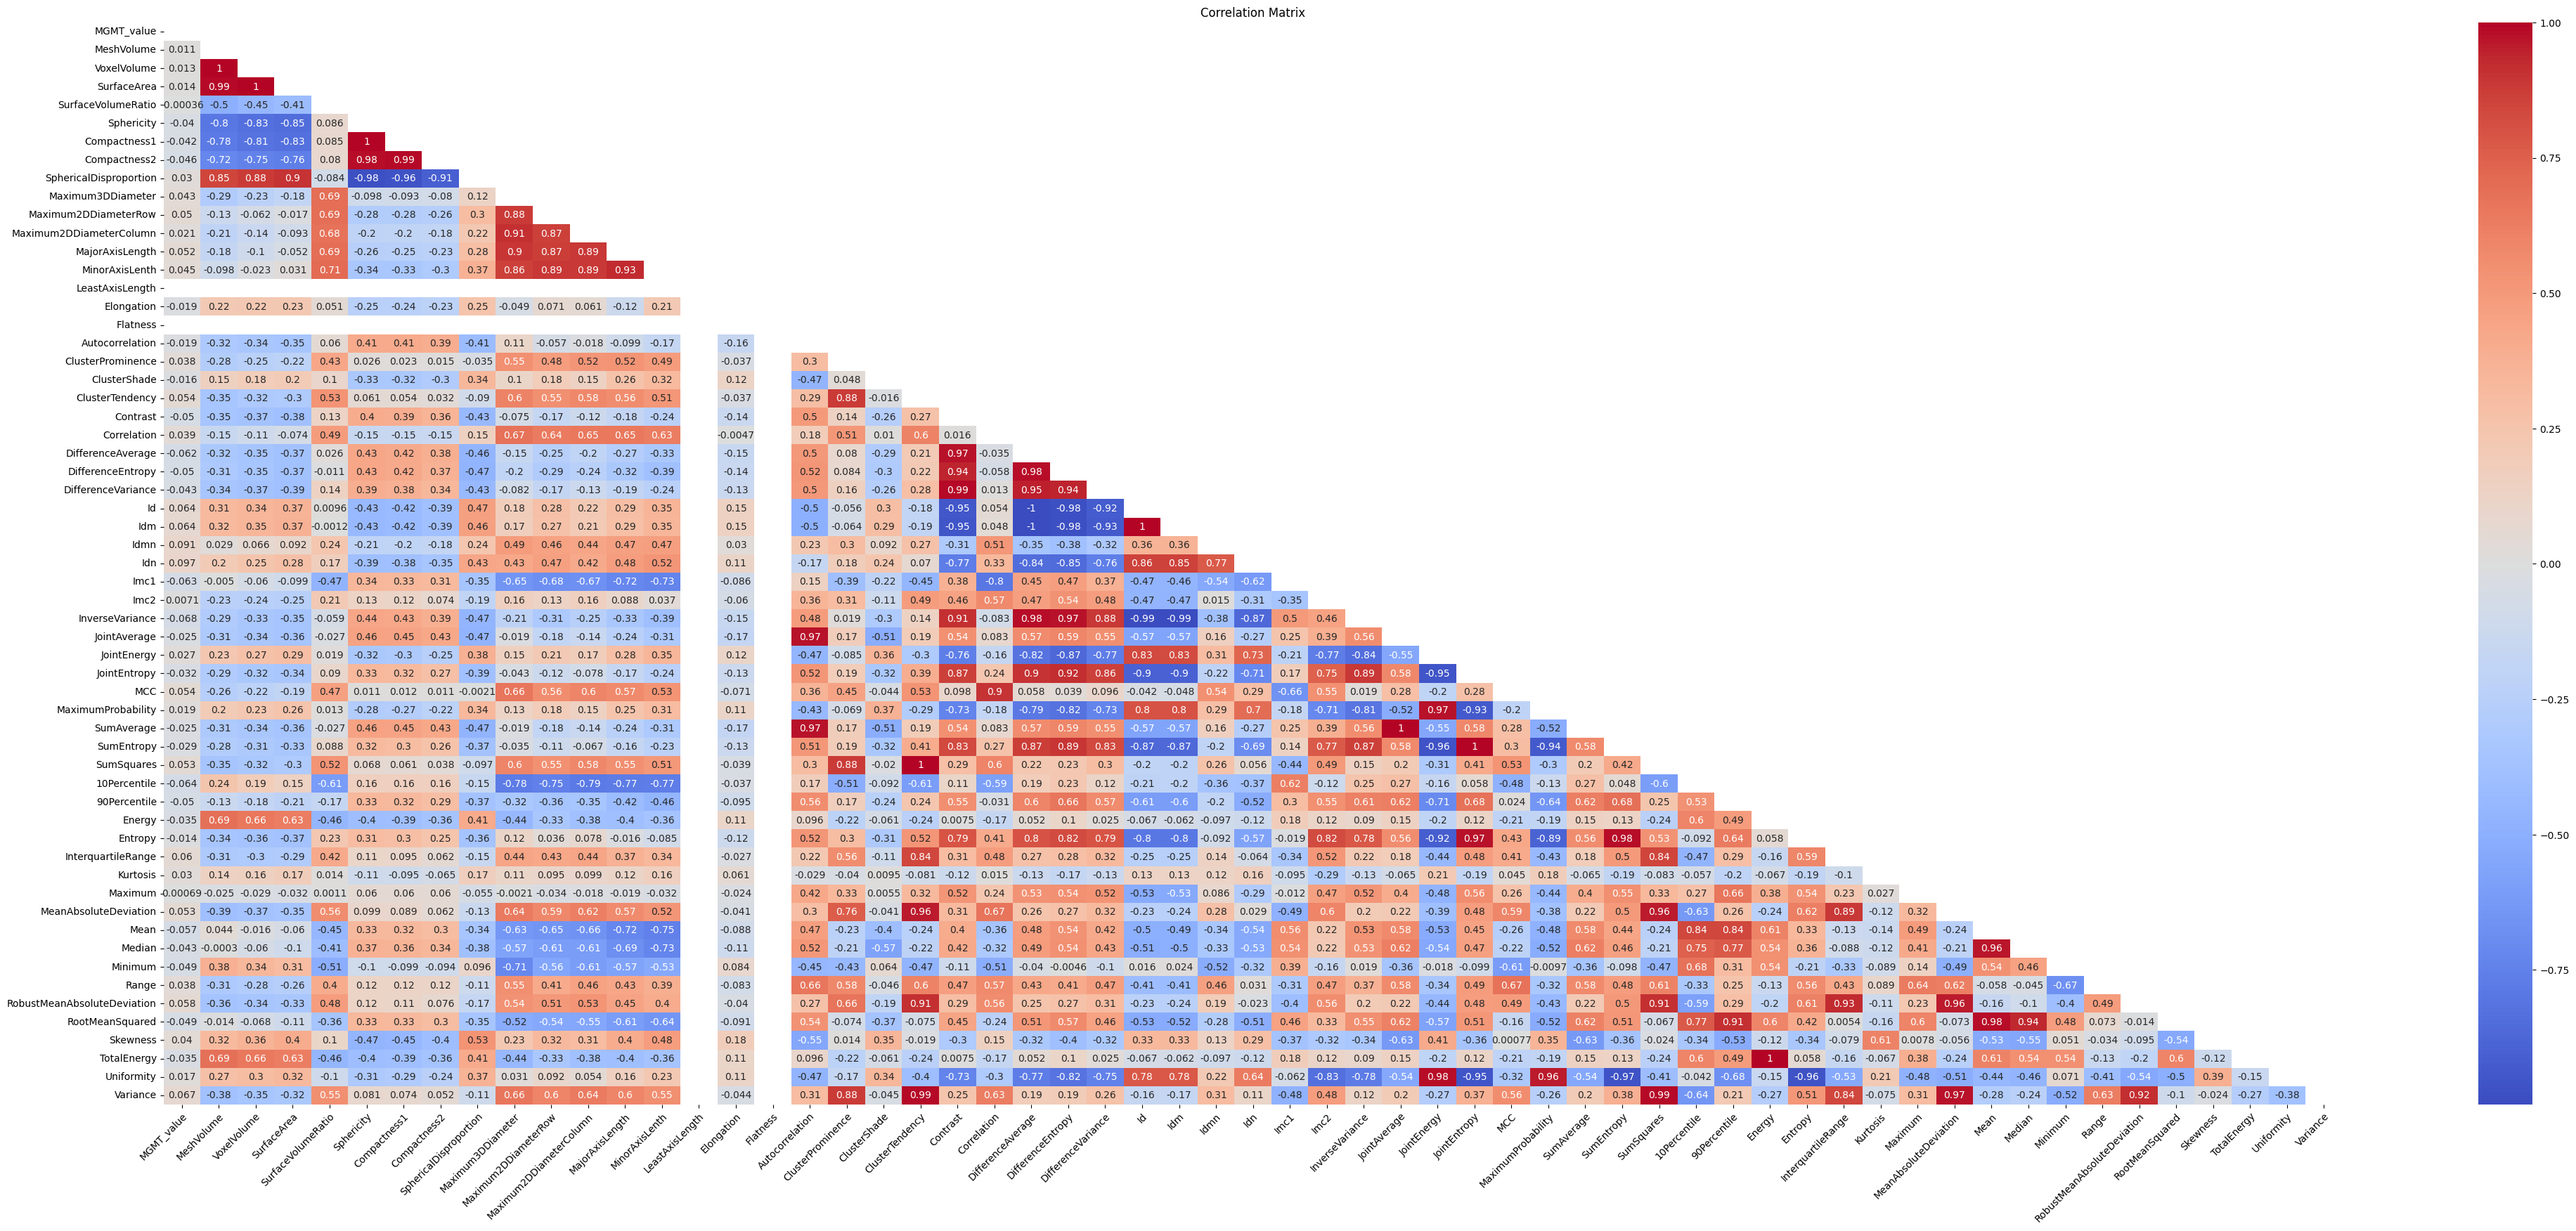

In [18]:


def show_triangle_correlation_matrix(df, title="Correlation Matrix", filter_threshold=0):
    corr_df = df.corr()
    if filter_threshold > 0:
        corr_df = filter_correlation_matrix(corr_df, filter_threshold)

    plt.figure(figsize=(50, 20))
    mask = np.triu(np.ones_like(corr_df))
    ax = sns.heatmap(corr_df, annot=True, mask=mask, cmap="coolwarm")  # Ajout de linewidths
    plt.title(title)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    plt.show()


show_triangle_correlation_matrix(df = dataset)

### Correlation Matrix with Strong correlation

As a rule of correlation threshold:
* 0.00-0.19: very weak.
* 0.20-0.39: weak.
* 0.40-0.59: moderate.
* 0.60-0.79: strong.
* 0.80-1.00: very strong.

We will use 0.7, strong.

### Correlation group with threshold strength

For correlation threshold equal to **0.7, strong.**

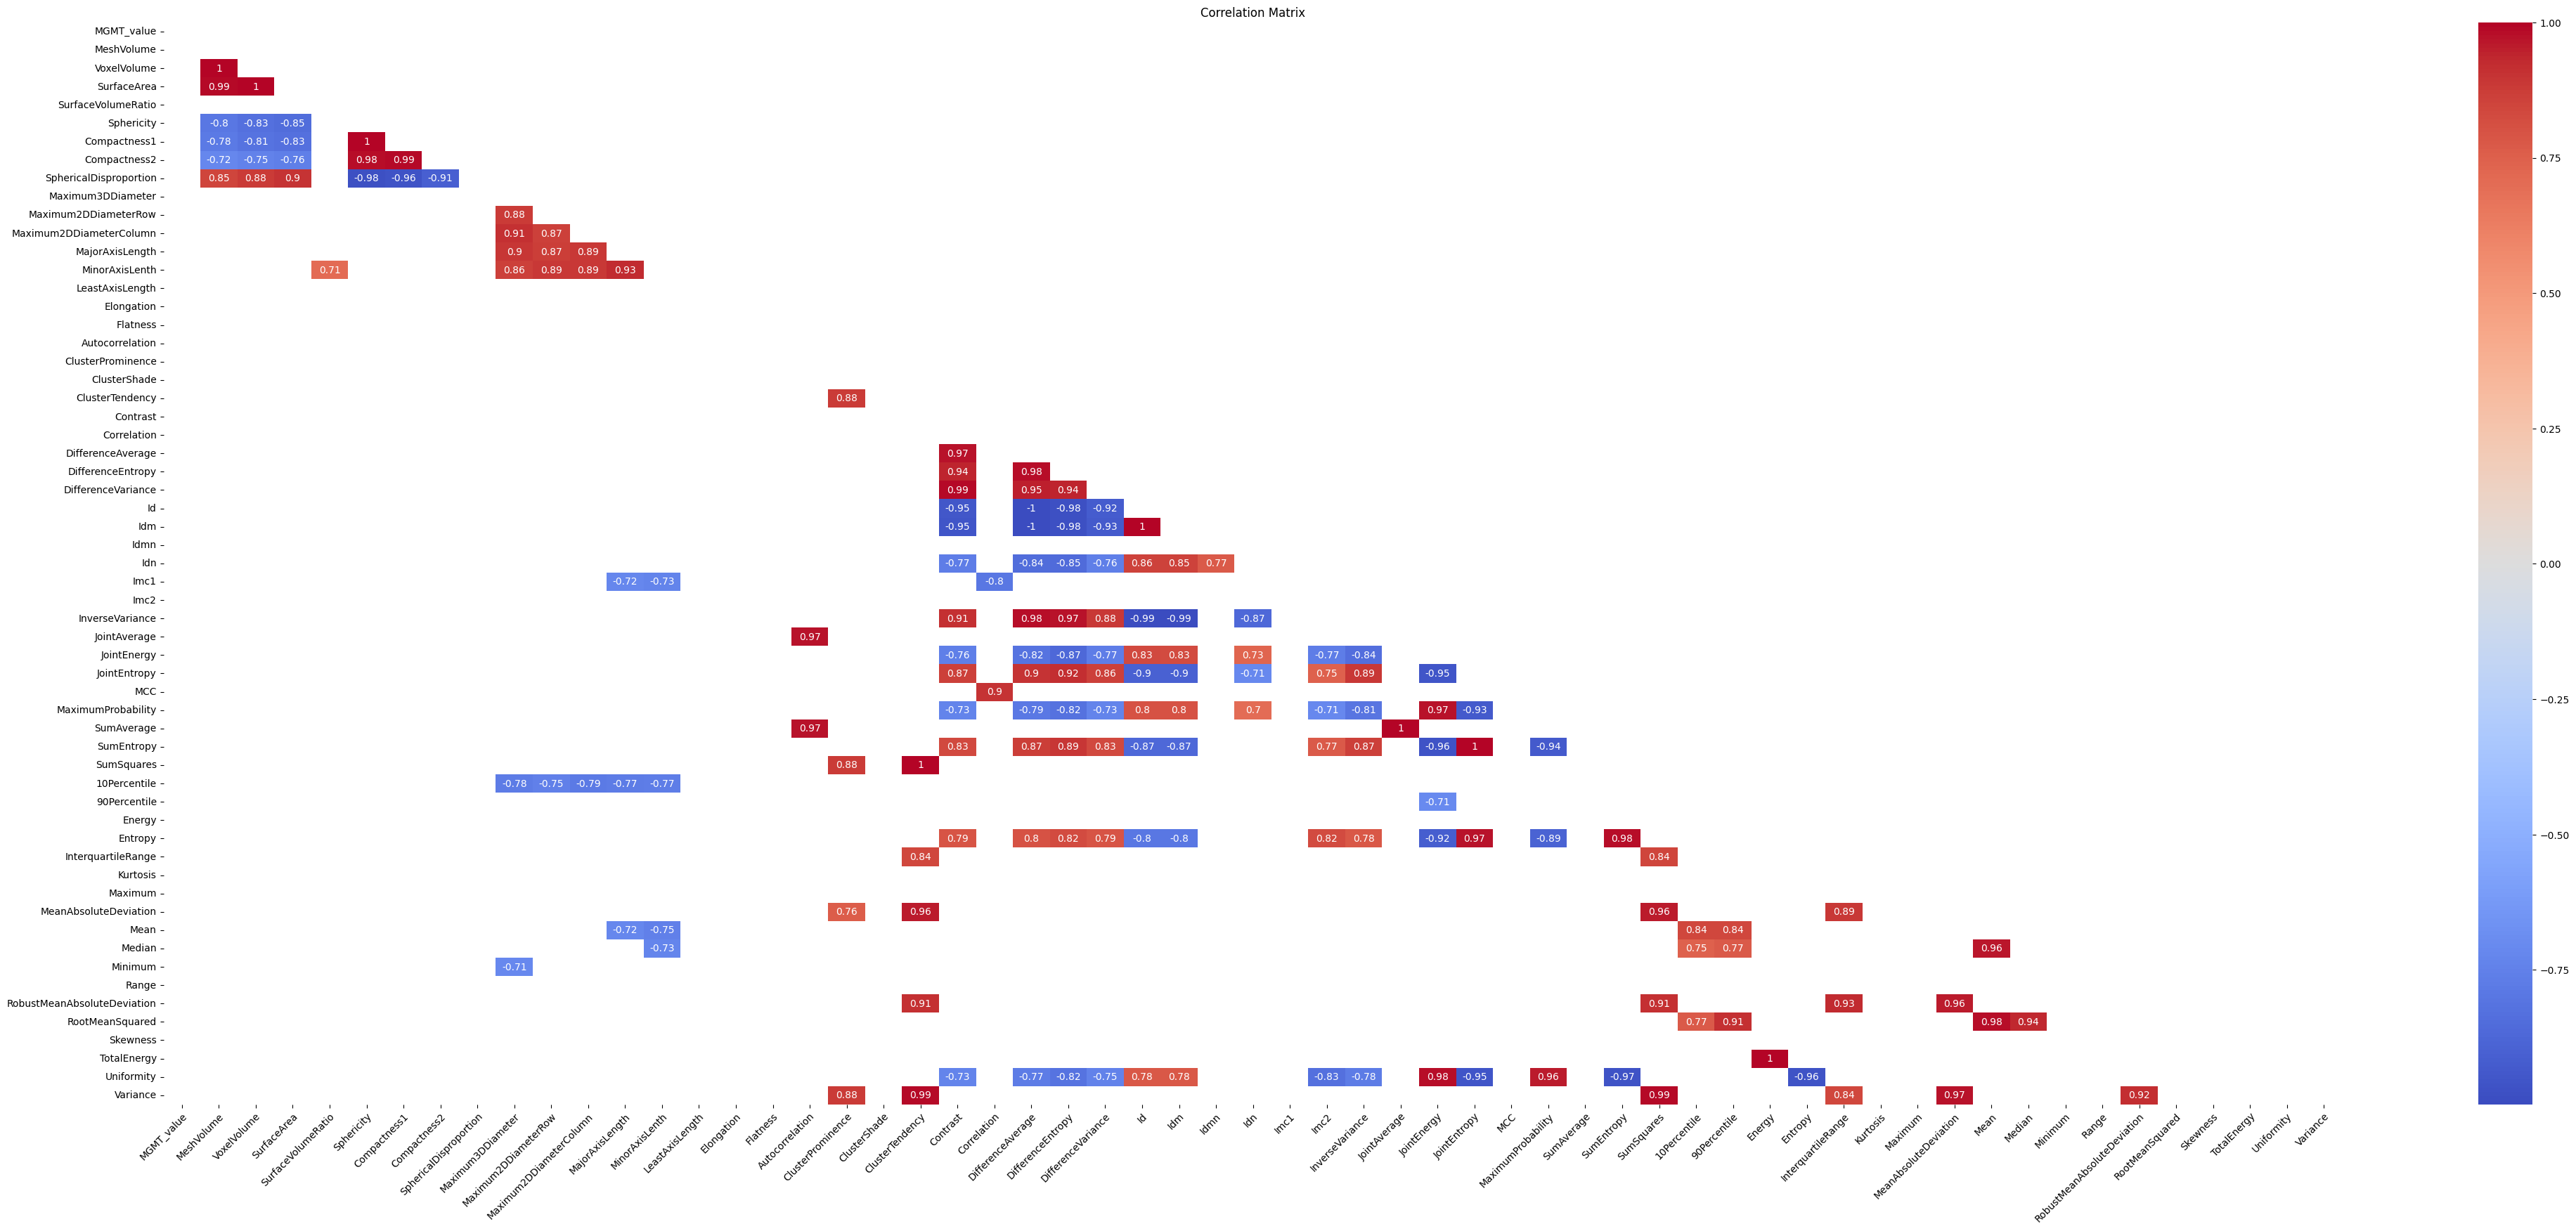

In [19]:
# Filtrer by correlation threshold
show_triangle_correlation_matrix(dataset,filter_threshold = 0.7)

Group of correlation threshold equal to 0.7

In [20]:
correlation_threshold = 0.7
groups_correlated_threshold_07 = find_highly_correlated_groups(dataset.corr(), correlation_threshold)

for group_correlated in groups_correlated_threshold_07:
    if len(group_correlated) > 1:
        print(group_correlated)

['MeshVolume', 'VoxelVolume', 'SurfaceArea', 'Sphericity', 'Compactness1', 'Compactness2', 'SphericalDisproportion']
['SurfaceVolumeRatio', 'MinorAxisLenth']
['Maximum3DDiameter', 'Maximum2DDiameterRow', 'Maximum2DDiameterColumn', 'MajorAxisLength', '10Percentile', 'Minimum']
['Autocorrelation', 'SumAverage', 'JointAverage']
['SumSquares', 'MeanAbsoluteDeviation', 'ClusterProminence', 'ClusterTendency', 'Variance']
['InverseVariance', 'JointEnergy', 'JointEntropy', 'MaximumProbability', 'SumEntropy', 'Entropy', 'Contrast', 'DifferenceAverage', 'DifferenceEntropy', 'DifferenceVariance', 'Id', 'Idm', 'Idn', 'Uniformity']
['MCC', 'Correlation', 'Imc1']
['Mean', '90Percentile', 'Median', 'RootMeanSquared']
['TotalEnergy', 'Energy']
['RobustMeanAbsoluteDeviation', 'InterquartileRange']


### Correlation group with threshold strength

For correlation threshold equal to **0.9, very strong.**

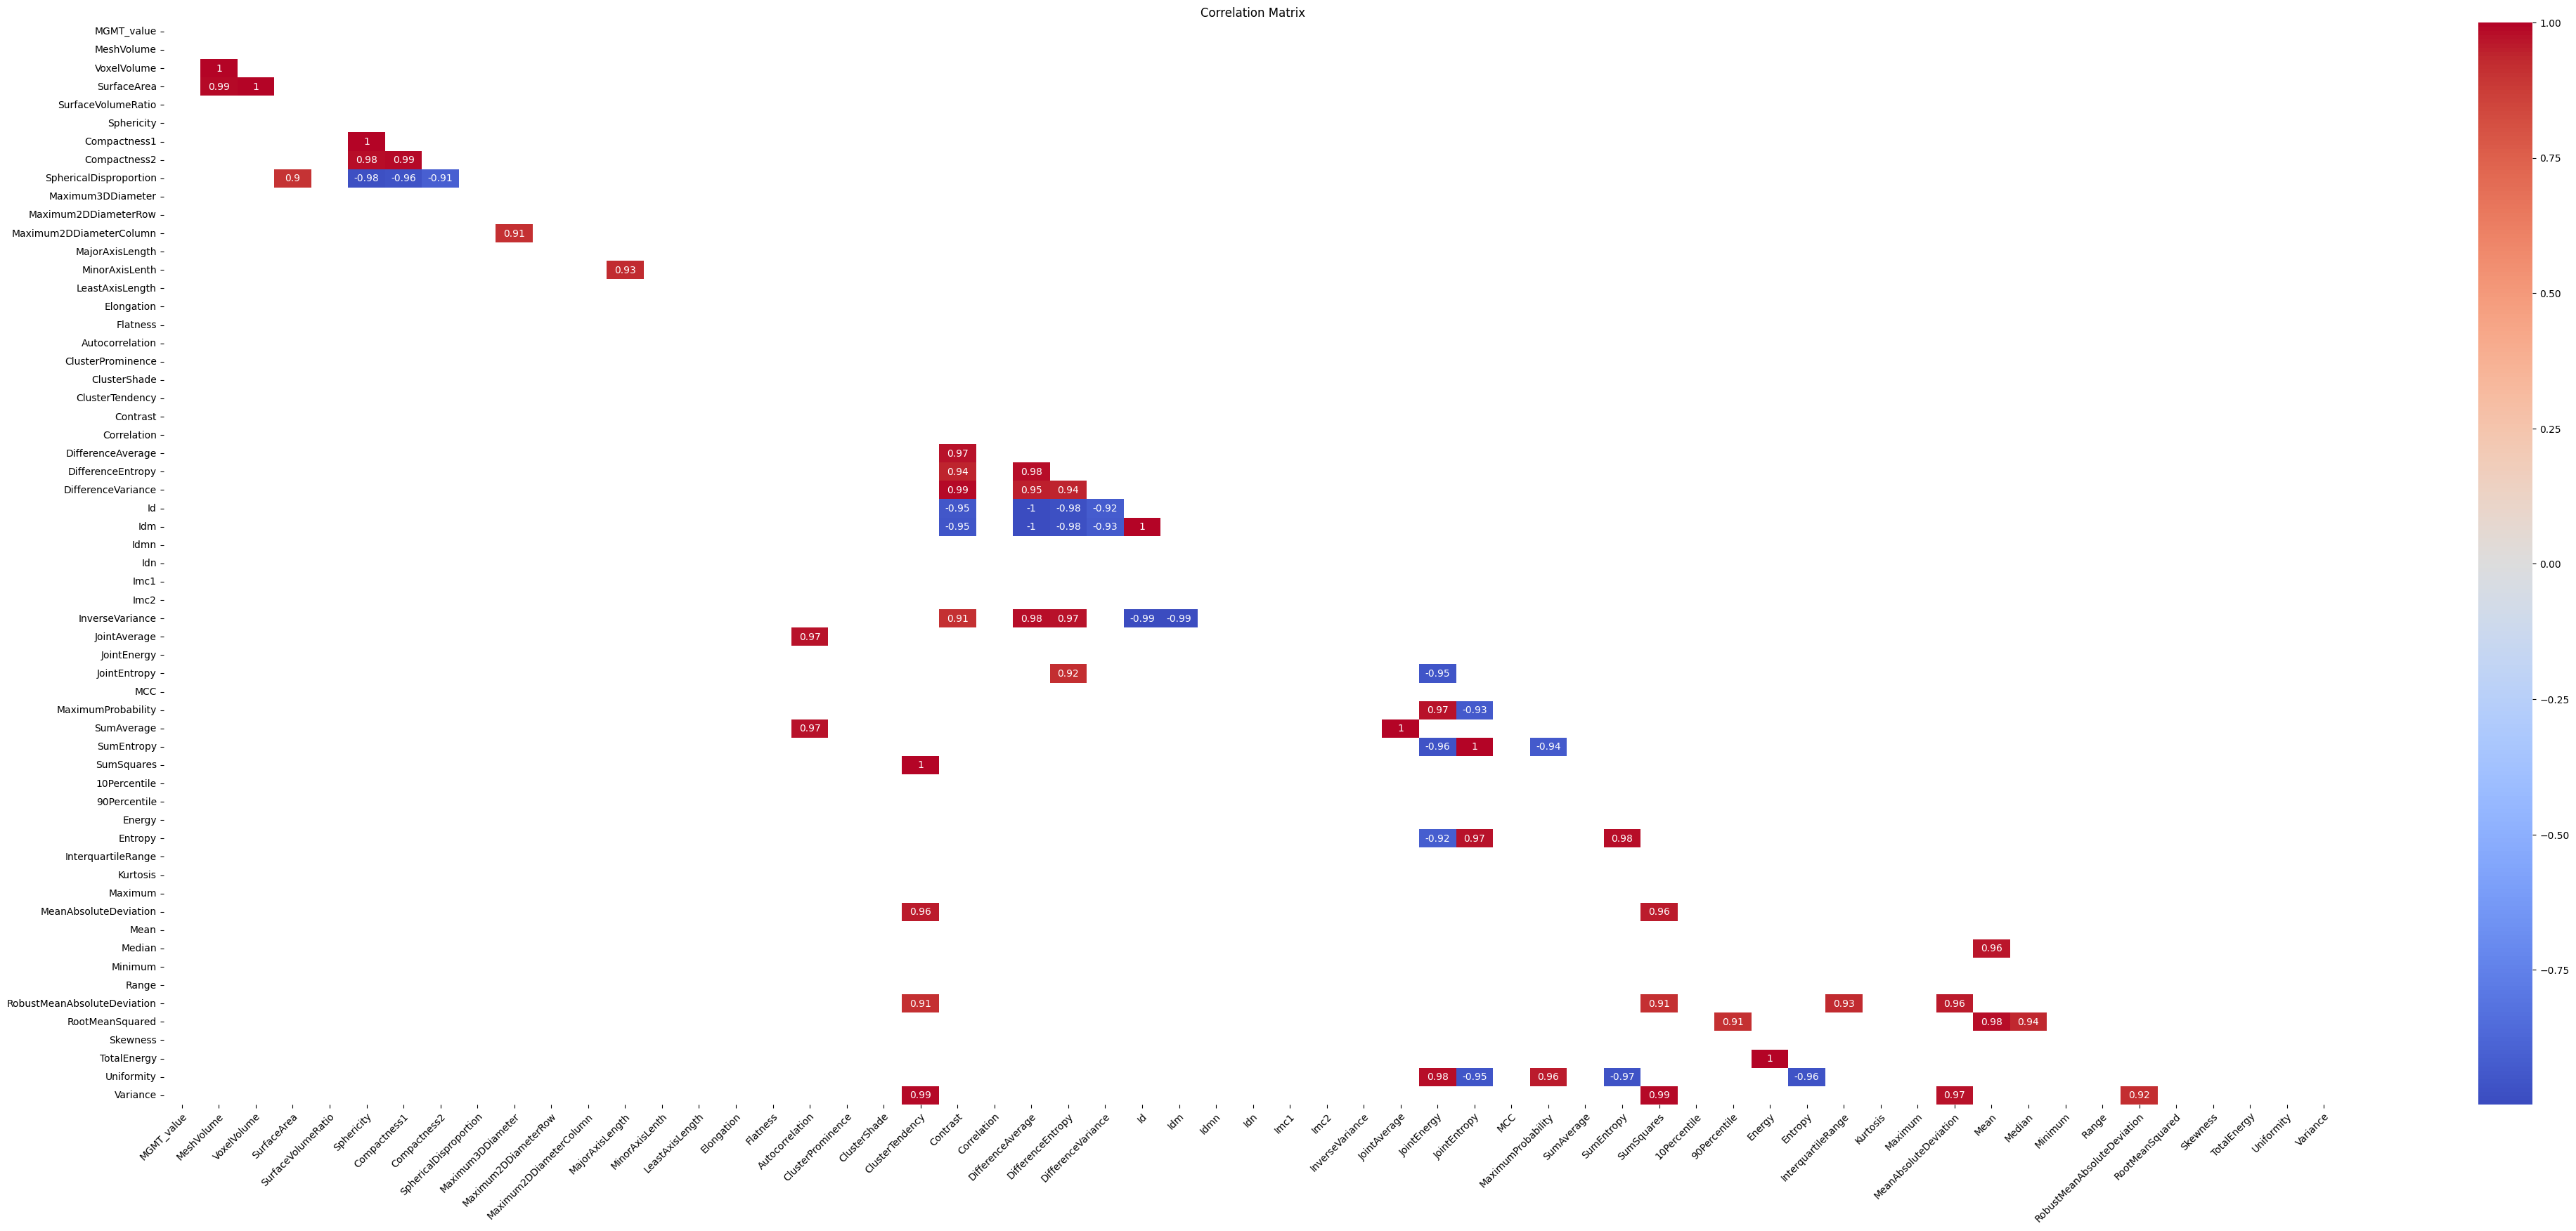

In [21]:
show_triangle_correlation_matrix(dataset,filter_threshold = 0.9)

Group of correlation threshold equal to *0.99*

In [22]:
correlation_threshold = 0.99
groups_correlated_threshold_099 = find_highly_correlated_groups(dataset.corr(), correlation_threshold)

for group_correlated in groups_correlated_threshold_099:
    if len(group_correlated) > 1:
        print(group_correlated)

['MeshVolume', 'VoxelVolume', 'SurfaceArea']
['Sphericity', 'Compactness1']
['SumSquares', 'ClusterTendency']
['DifferenceVariance', 'Contrast']
['Id', 'Idm', 'DifferenceAverage']
['JointAverage', 'SumAverage']
['JointEntropy', 'SumEntropy']
['TotalEnergy', 'Energy']


### ℹ️ **Note**: 

Based on the provided analysis, we can draw the following conclusions:

**When considering a correlation threshold of 0.7, strong positive correlations were observed between:**

For shape 2D :

* `['MeshSurface', 'PixelSurface']`
* `['Perimeter', 'Sphericity', 'SphericalDisproportion', 'MaximumDiameter', 'MajorAxisLength', 'MinorAxisLenth', 'Mean', 'Median']`
* `['JointAverage', 'SumAverage', 'Autocorrelation']`
* `['SumSquares', 'MeanAbsoluteDeviation', 'ClusterProminence', 'ClusterTendency', 'Variance']`
* `['SumEntropy', 'Entropy', 'Contrast', 'DifferenceAverage', 'DifferenceEntropy', 'DifferenceVariance', 'Id', 'Idm', 'Uniformity', 'Idn', 'InverseVariance', 'JointEnergy', 'JointEntropy', 'MaximumProbability']`
* `['Correlation', 'Imc1', 'MCC']`
* `['RootMeanSquared', '10Percentile']`
* `['TotalEnergy', 'Energy']`
* `['RobustMeanAbsoluteDeviation', 'InterquartileRange']`

For shape 3D :

* `['MeshVolume', 'VoxelVolume', 'SurfaceArea', 'Sphericity', 'Compactness1', 'Compactness2', 'SphericalDisproportion']`
* `['InverseVariance', 'Maximum3DDiameter', 'Maximum2DDiameterRow', 'Maximum2DDiameterColumn', 'MajorAxisLength', 'MinorAxisLenth', '10Percentile', 'Mean', 'Median', 'Minimum', 'RootMeanSquared', 'Idn', 'Imc1']`
* `['JointAverage', 'JointEntropy', 'SumAverage', 'SumEntropy', '90Percentile', 'Entropy', 'Autocorrelation', 'DifferenceAverage', 'Id', 'Idm']`
* `['SumSquares', 'ClusterProminence', 'ClusterTendency', 'Variance']`
* `['JointEnergy', 'MaximumProbability', 'Contrast', 'DifferenceEntropy', 'DifferenceVariance', 'Uniformity']`
* `['MCC', 'Correlation']`
* `['MeanAbsoluteDeviation', 'Skewness', 'Imc2']`
* `['TotalEnergy', 'Energy']`
* `['RobustMeanAbsoluteDeviation', 'InterquartileRange']`
* `['Range', 'Maximum']`


**When considering a correlation threshold of 0.99, very strong positive correlations were observed between:**

For shape 2D :

* `['MeshSurface', 'PixelSurface']`
* `['SumSquares', 'ClusterTendency']`
* `['DifferenceVariance', 'Contrast']`
* `['DifferenceAverage', 'Id', 'Idm']`
* `['SumAverage', 'JointAverage']`
* `['SumEntropy', 'JointEntropy']`
* `['TotalEnergy', 'Energy']`

For shape 3D :

* `['MeshVolume', 'VoxelVolume']`
* `['Sphericity', 'Compactness1']`
* `['SumSquares', 'ClusterTendency']`
* `['Id', 'Idm', 'DifferenceAverage']`
* `['JointAverage', 'SumAverage']`
* `['Uniformity', 'JointEnergy']`
* `['JointEntropy', 'SumEntropy']`
* `['TotalEnergy', 'Energy']`
* `['Mean', 'RootMeanSquared]`

## <a id='analysis_7_3'>7.3. Analyse univariée</a>

Test de normalité utilisé : Shapiro-Wilk : Puissant et précis, recommandé pour les échantillons de petite taille

Teste le skewness : mesure l'assymétrie d'une série (0 si suit loi normale). Lorsque la Skewness est égal à 0, le dataset est symétrique. Mais cette mesure nous renseigne aussi sur le type d’asymétrie.

Teste le kurtosis : mesure l'applatissement (vaut 3 si loi normale de Laplace) mais on utilise aussi l'excédent de Kurtosis. Si le Kurtosis est supérieur à 3, alors l’ensemble de données est leptokurtique, c’est-à-dire que les queues sont plus épaisses que la normale. Cela indique un regroupement d’outliers.

Si le Kurtosis est inférieur à 3, alors l’ensemble de données est platykurtique, c’est-à-dire que les queues sont plus fines que la normale. Cela indique un excès négatif d’outlier. En d’autres termes, la plupart des données ont tendance à se rassembler autour de la moyenne.

Lorsque le Kurtosis est égal à 3, alors l’ensemble de données est mésokurtique, c’est-à-dire que les queues sont les mêmes que dans une distribution normale.

### **ℹ️ Note:**

Graphiques utilisés :
- Histogramme avec courbe de densité de probabilité (le point rouge indique la moyenne)
- Boxplot
- QQ plot (diagramme Quantile-Quantile) : permet d'évaluer la pertinence de l'ajustement d'une distribution donnée à un modèle théorique.

<h3>Description statistique du dataset complet</h3>

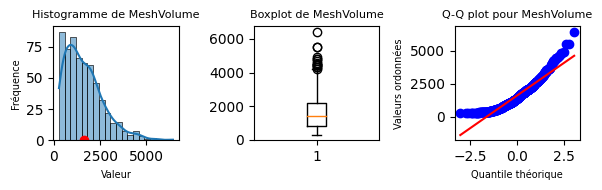

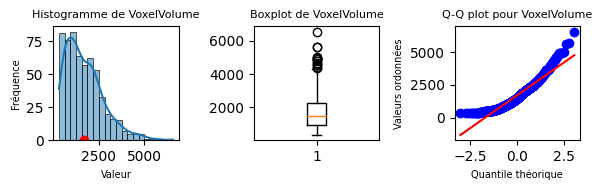

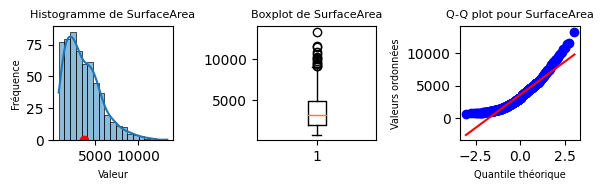

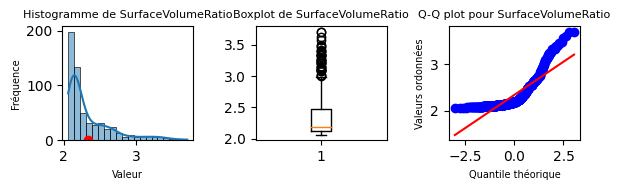

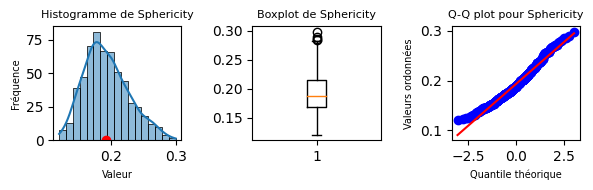

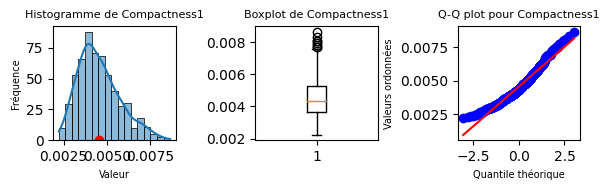

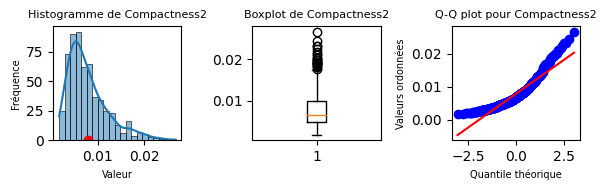

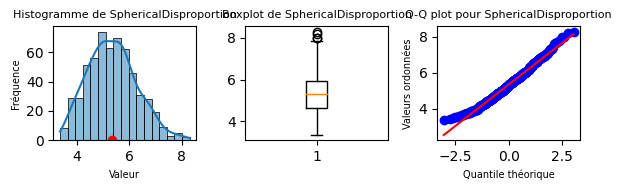

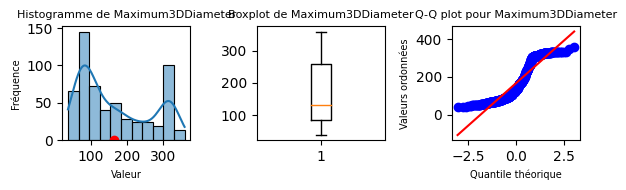

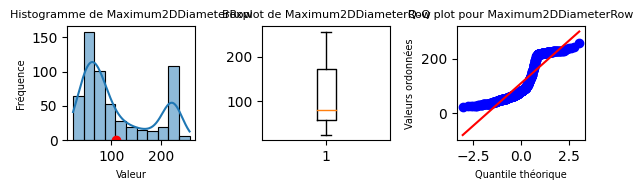

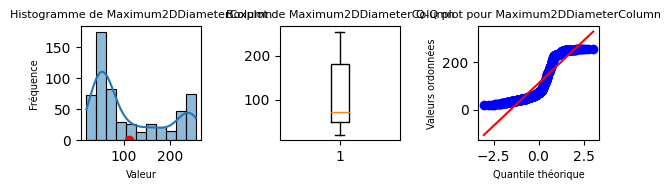

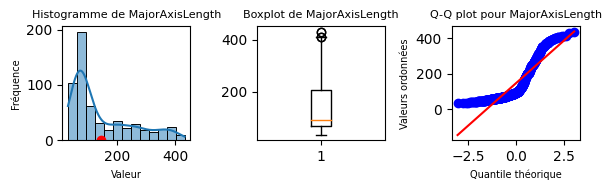

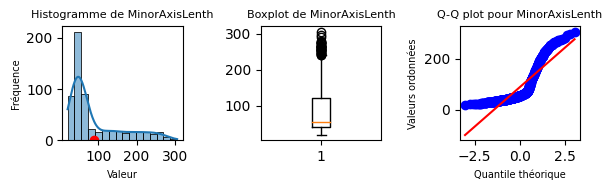

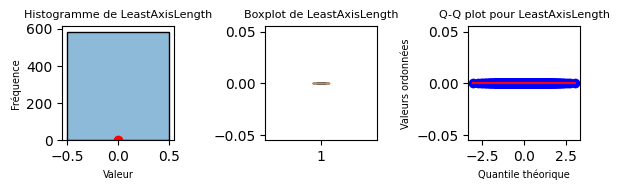

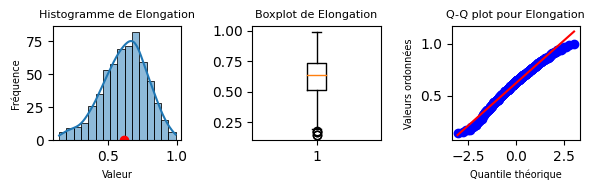

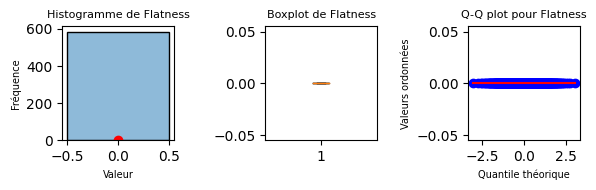

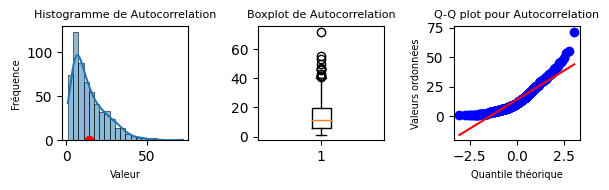

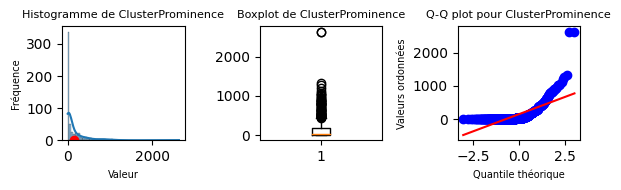

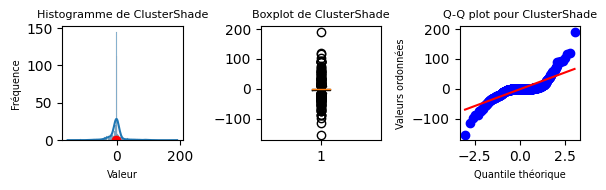

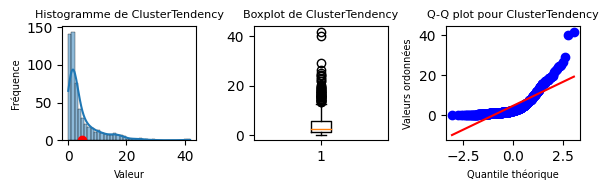

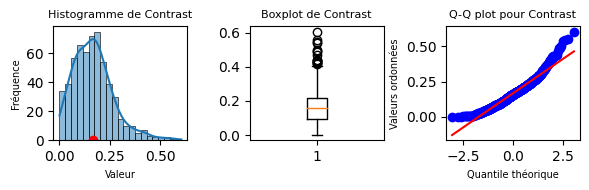

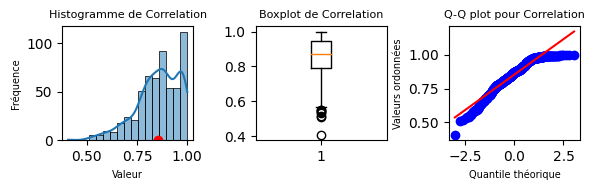

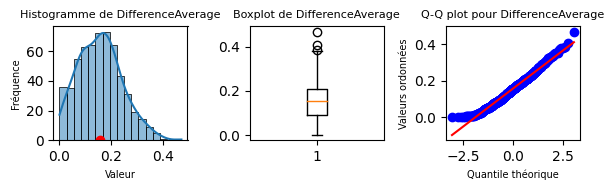

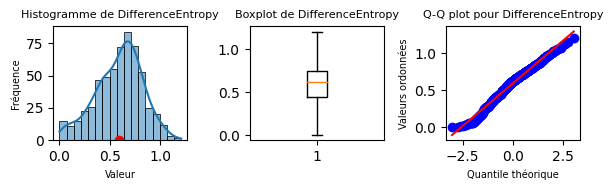

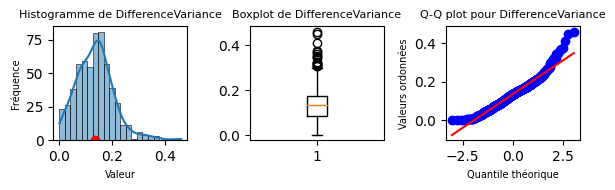

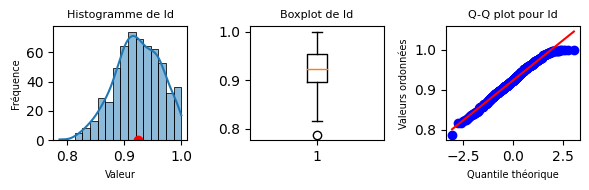

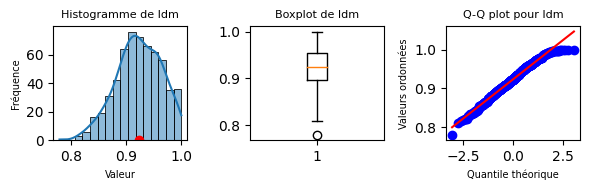

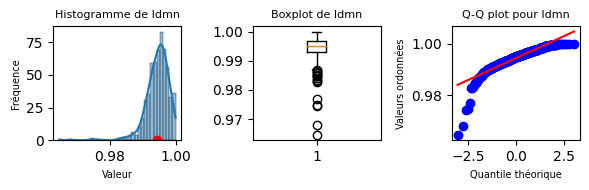

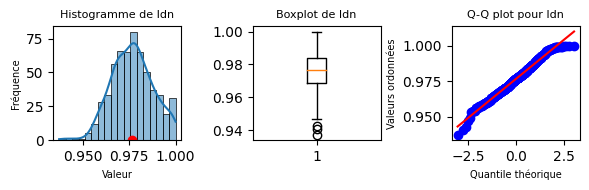

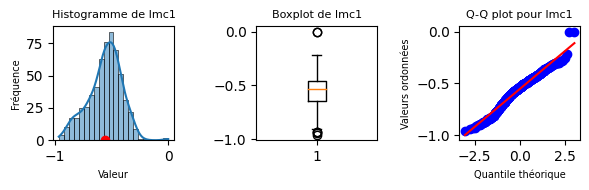

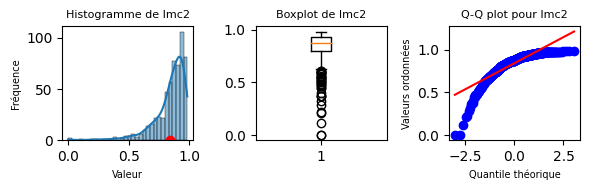

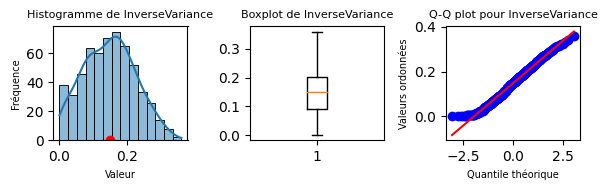

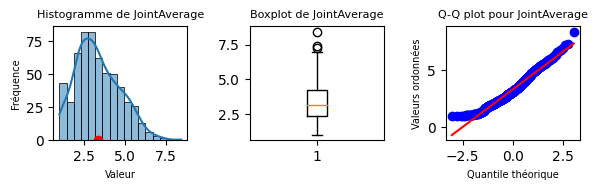

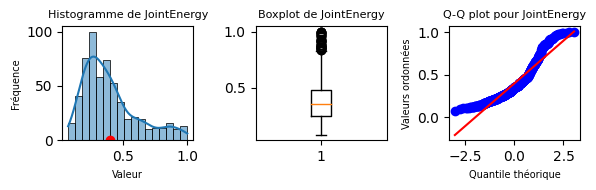

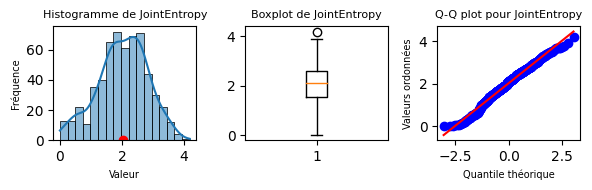

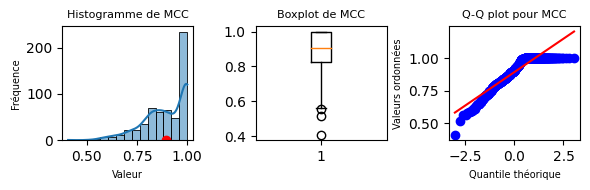

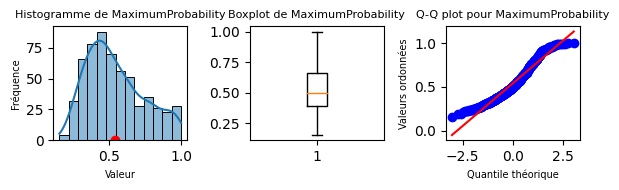

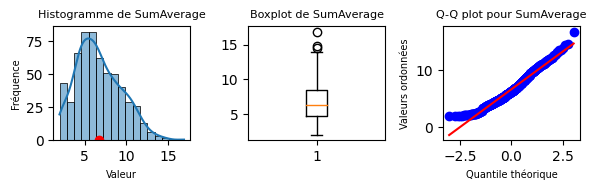

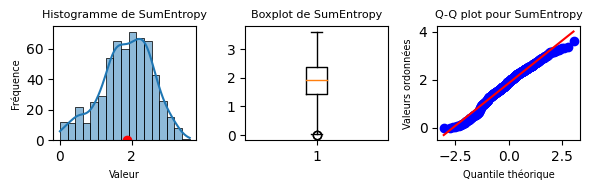

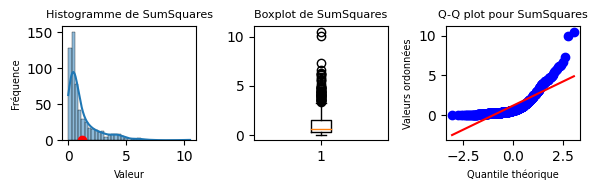

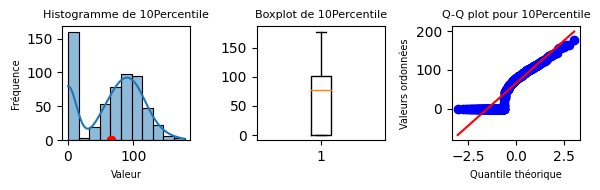

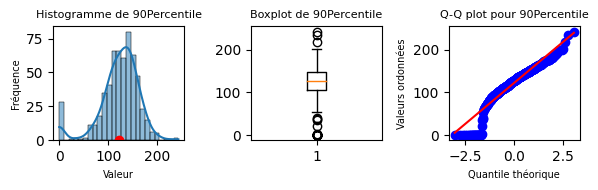

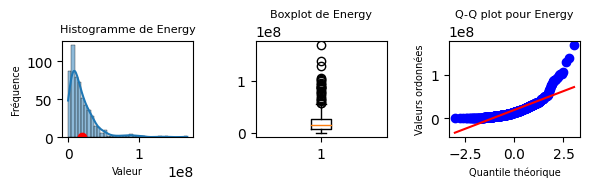

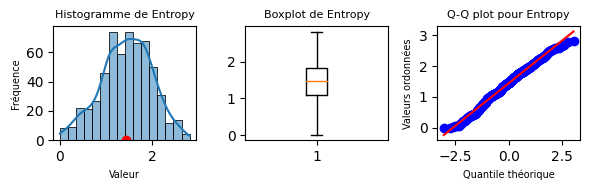

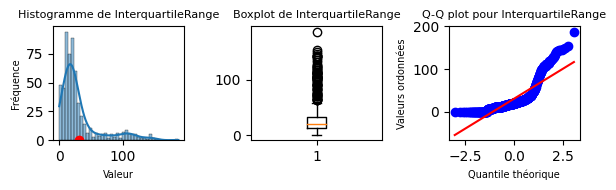

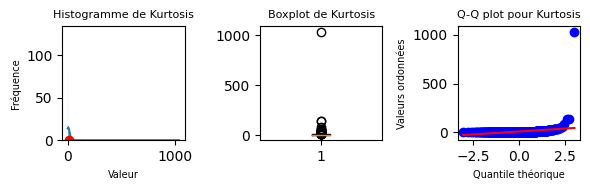

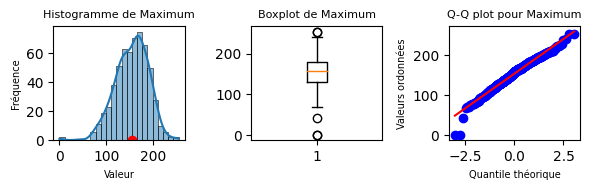

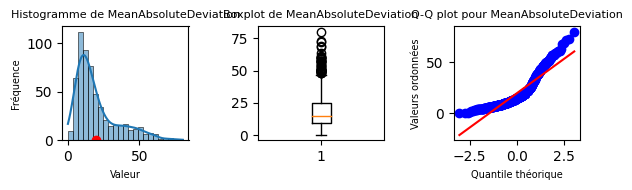

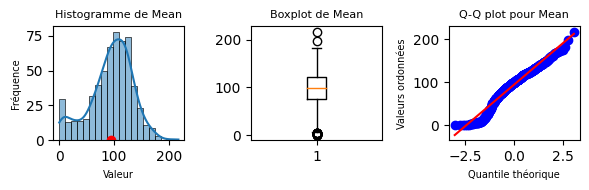

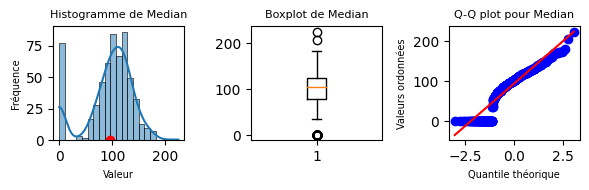

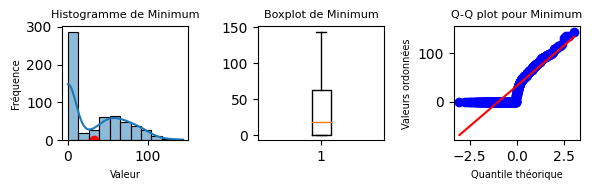

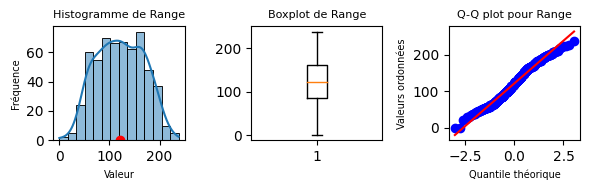

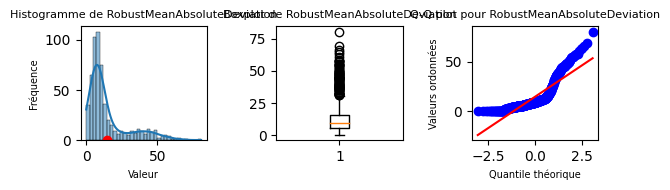

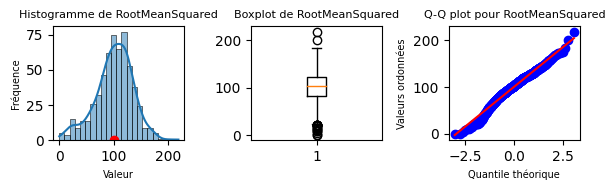

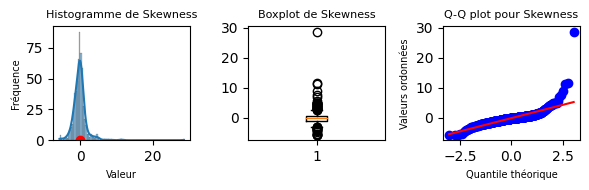

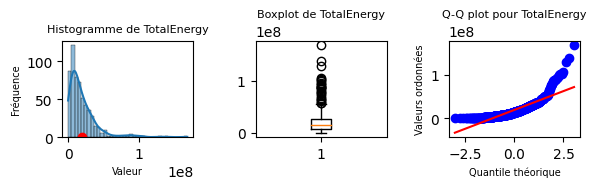

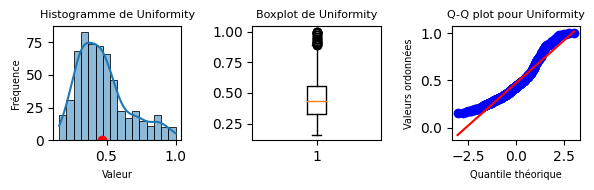

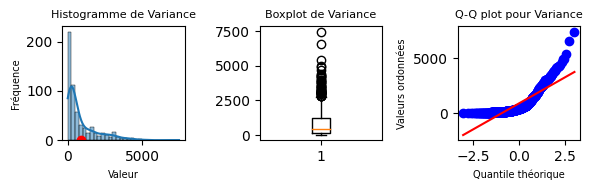

Description dataset complet


MeshVolume  VoxelVolume   SurfaceArea SurfaceVolumeRatio  \
count                  585.0        585.0         585.0              585.0   
mean             1624.166382  1726.358974   3633.508797           2.340792   
std              1020.917998  1034.724165   2121.580768           0.328713   
min                    274.0        339.0    737.383557           2.060167   
25%               838.833333        933.0   2000.899535           2.122854   
50%              1434.916667       1499.0   3162.464571           2.184898   
75%              2188.416667       2286.0   4840.097049            2.47139   
max              6445.083333       6563.0  13389.943637           3.709638   
skewness            1.097811      1.10363      1.097594           1.828148   
kurtosis            4.422711     4.402759      4.368434           5.982715   
excess_kurtosis     1.422711     1.402759      1.368434           2.982715   
shapiro_test             0.0          0.0           0.0                0.0   
normalite                Non          Non           Non                Non   

                Sphericity Compactness1 Compactness2 SphericalDisproportion  \
count                585.0        585.0        585.0                  585.0   
mean              0.192897     0.004546     0.007859               5.342529   
std               0.033872     0.001207      0.00431               0.925669   
min                0.12055      0.00222     0.001752                3.34632   
25%               0.168592     0.003672     0.004792               4.661304   
50%               0.188463      0.00434     0.006694               5.306086   
75%               0.214532     0.005272     0.009874               5.931469   
max               0.298836     0.008667     0.026687               8.295319   
skewness          0.490316      0.69436     1.310627               0.345008   
kurtosis          2.846319     3.138105     4.702997               2.844475   
excess_kurtosis  -0.153681     0.138105     1.702997              -0.155525   
shapiro_test           0.0          0.0          0.0               0.000213   
normalite              Non          Non          Non                    Non   

                Maximum3DDiameter Maximum2DDiameterRow  \
count                       585.0                585.0   
mean                   166.000744            110.08547   
std                     96.590299            68.022329   
min                     37.696154                 24.0   
25%                     83.677954                 57.0   
50%                    130.942736                 81.0   
75%                     257.60823                173.0   
max                    359.918046                256.0   
skewness                 0.554839             0.741555   
kurtosis                 1.788009             1.978629   
excess_kurtosis         -1.211991            -1.021371   
shapiro_test                  0.0                  0.0   
normalite                     Non                  Non   

                Maximum2DDiameterColumn MajorAxisLength MinorAxisLenth  \
count                             585.0           585.0          585.0   
mean                          111.45812      146.427102      88.745993   
std                           78.436512      105.212652      69.847424   
min                                19.0         32.8521      19.514556   
25%                                49.0         68.5899        42.0515   
50%                                71.0       91.641829      54.637606   
75%                               181.0      205.833779      121.31062   
max                               256.0      432.662145     306.081351   
skewness                       0.740339        1.110597       1.360128   
kurtosis                       1.935137        2.965145       3.570317   
excess_kurtosis               -1.064863       -0.034855       0.570317   
shapiro_test                        0.0             0.0            0.0   
normalite                           Non    

In [23]:
describe=show_test_normality(dataset.drop('MGMT_value',axis=1))

print("Description dataset complet")
describe

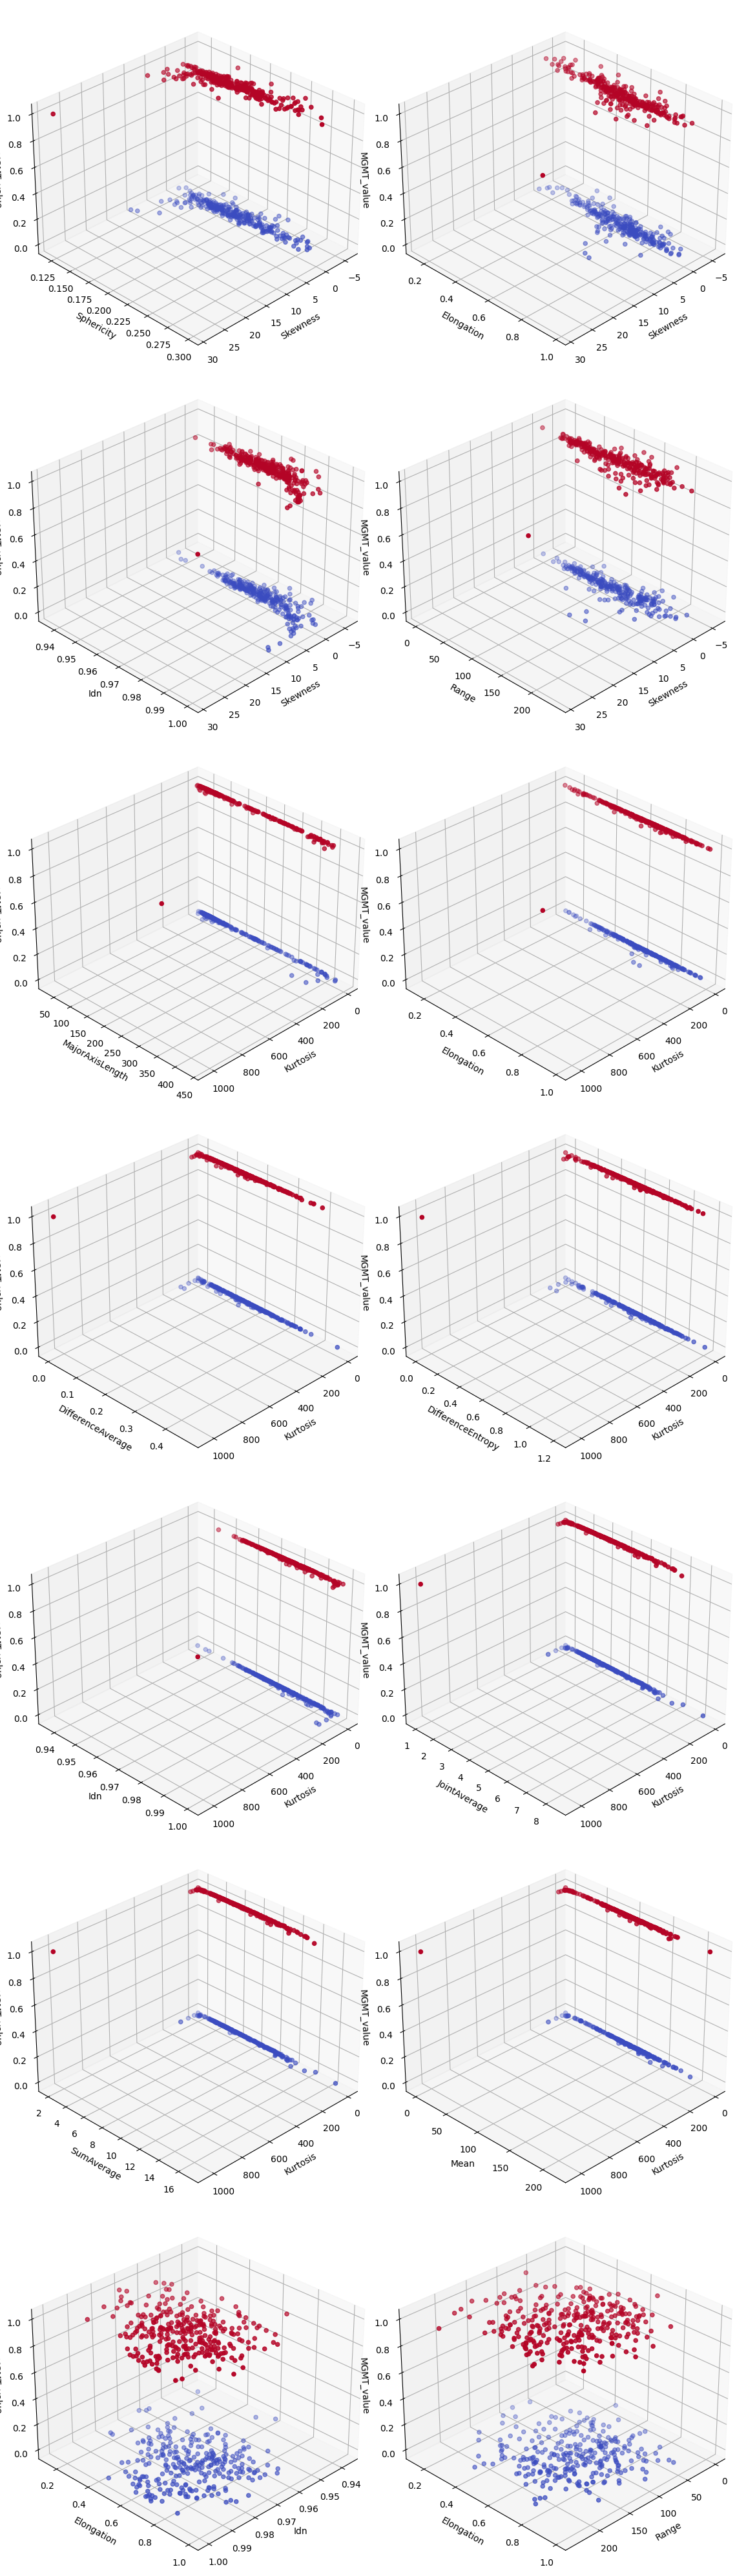

In [24]:
combinations_party = [
    ('Skewness', 'Sphericity', 'MGMT_value'),
    ('Skewness', 'Elongation', 'MGMT_value'),
    ('Skewness', 'Idn', 'MGMT_value'),
    ('Skewness', 'Range', 'MGMT_value'),
    
    ('Kurtosis', 'MajorAxisLength', 'MGMT_value'),
    ('Kurtosis', 'Elongation', 'MGMT_value'),
    
    ('Kurtosis', 'DifferenceAverage', 'MGMT_value'),
    ('Kurtosis', 'DifferenceEntropy', 'MGMT_value'),
    
    ('Kurtosis', 'Idn', 'MGMT_value'),
    ('Kurtosis', 'JointAverage', 'MGMT_value'),
    
    ('Kurtosis', 'SumAverage', 'MGMT_value'),
    ('Kurtosis', 'Mean', 'MGMT_value'),    
    
    ('Idn', 'Elongation', 'MGMT_value'),
    ('Range', 'Elongation', 'MGMT_value'),

]

show_3D_scatter_plots(combinations_party, dataset, figsize=(12, 40), elev_angle=30, azimuth_angle=45)

### ℹ️ **Note**: 

Le jeu de données montre que les les valeurs cibles sont homogènes.

Beaucoup de variables ne répondent pas au test de Shapiro-Wilk indiquant que les variables explicatives ne suivent pas une loi normale.

Pour shape 2D 

* Variables ayant un skewness correct : Sphericity, Elongation, Idn, Range,
* Variables ayant un bon kurtosis : MajorAxisLength, Elongation, DifferenceAverage, DifferenceEntropy, Idn, JointAverage, SumAverage, Mean,
* En analysant les graphiques, variables semblant bonnes sur le Q-Q plot sans trop de valeurs extrêmes : Elongation, DifferenceAverage, DifferenceEntropy, JointEntropy, SumEntropy, Entropy, Maximum, Range

* Mais cela ne signifie pas que le dataset soit mauvais, il permet de faire ressortir les variables avec des valeurs extrêmes.
* Elongation, Idn et Range semblent être homogènes.

<h3>Description statistique du dataset pour la classe MGMT_value = 1</h3>

In [25]:
describe_MGMT_1=show_test_normality(dataset[dataset.MGMT_value == 1].drop('MGMT_value',axis=1),graphic=False)

print("Description du dataset pour MGMT_value = 1")
describe_MGMT_1

Description du dataset pour MGMT_value = 1


MeshVolume  VoxelVolume   SurfaceArea SurfaceVolumeRatio  \
count                  307.0        307.0         307.0              307.0   
mean             1634.858035  1738.925081   3661.485461           2.340681   
std                 996.3893  1009.474294   2069.739745           0.325699   
min               289.416667        339.0    737.383557           2.060167   
25%               882.583333        956.0   2071.037496           2.121142   
50%              1447.166667       1502.0   3154.248787           2.184275   
75%              2202.791667       2285.0   4843.443059             2.4905   
max                  5519.25       5623.0  11462.853093           3.709638   
skewness            0.969952     0.983798       0.98887           1.789655   
kurtosis            3.815704     3.825399      3.846304           5.964803   
excess_kurtosis     0.815704     0.825399      0.846304           2.964803   
shapiro_test             0.0          0.0           0.0                0.0   
normalite                Non          Non           Non                Non   

                Sphericity Compactness1 Compactness2 SphericalDisproportion  \
count                307.0        307.0        307.0                  307.0   
mean              0.191621     0.004498     0.007669               5.369071   
std               0.032762     0.001164     0.004123               0.904022   
min                0.12055      0.00222     0.001752                3.34632   
25%               0.168682     0.003675       0.0048               4.730039   
50%               0.187078     0.004293     0.006547               5.345364   
75%               0.211415     0.005157     0.009449               5.928302   
max               0.298836     0.008667     0.026687               8.295319   
skewness          0.515635     0.728892     1.394712               0.338454   
kurtosis           2.99051     3.340361     5.297852               2.911241   
excess_kurtosis   -0.00949     0.340361     2.297852              -0.088759   
shapiro_test      0.000252     0.000001          0.0               0.036196   
normalite              Non          Non          Non                    Non   

                Maximum3DDiameter Maximum2DDiameterRow  \
count                       307.0                307.0   
mean                   169.967969           113.322476   
std                     99.846747            69.920568   
min                     37.696154                 24.0   
25%                     84.338977                 58.0   
50%                    132.034087                 83.0   
75%                    278.989021                195.5   
max                    350.138544                243.0   
skewness                 0.455624             0.653698   
kurtosis                 1.625066             1.792816   
excess_kurtosis         -1.374934            -1.207184   
shapiro_test                  0.0                  0.0   
normalite                     Non                  Non   

                Maximum2DDiameterColumn MajorAxisLength MinorAxisLenth  \
count                             307.0           307.0          307.0   
mean                         113.042345      151.641263      91.762557   
std                           81.285755      107.640637      72.572074   
min                                21.0         32.8521      21.643629   
25%                                47.0       68.269575      41.541962   
50%                                68.0       94.272353      54.685078   
75%                               199.5      236.561478     131.849394   
max                               256.0      413.087191     306.081351   
skewness                       0.653351        0.943434        1.26323   
kurtosis                       1.751271        2.535841       3.320733   
excess_kurtosis               -1.248729       -0.464159       0.320733   
shapiro_test                        0.0             0.0            0.0   
normalite                           Non    

<h3>Description statistique du dataset pour la classe MGMT_value = 0</h3>

In [26]:
describe_MGMT_0=show_test_normality(dataset[dataset.MGMT_value == 0].drop('MGMT_value',axis=1),graphic=False)

print("Description du dataset pour MGMT_value = 0")
describe_MGMT_0

Description du dataset pour MGMT_value = 0


MeshVolume  VoxelVolume   SurfaceArea SurfaceVolumeRatio  \
count                  278.0        278.0         278.0              278.0   
mean             1612.359412  1712.482014   3602.613704           2.340915   
std              1049.014784  1063.565024   2180.724496           0.332598   
min                    274.0        367.0     814.95268           2.065828   
25%                   802.75       893.25   1858.582358           2.124292   
50%              1431.291667       1493.0   3169.039433           2.185904   
75%              2141.583333       2287.5   4787.700879           2.431712   
max              6445.083333       6563.0  13389.943637           3.707339   
skewness            1.220448     1.219064      1.202957           1.867439   
kurtosis            4.964804     4.918585       4.83547           5.995437   
excess_kurtosis     1.964804     1.918585       1.83547           2.995437   
shapiro_test             0.0          0.0           0.0                0.0   
normalite                Non          Non           Non                Non   

                Sphericity Compactness1 Compactness2 SphericalDisproportion  \
count                278.0        278.0        278.0                  278.0   
mean              0.194306     0.004599     0.008069               5.313218   
std               0.035061     0.001252     0.004505               0.949773   
min               0.122043     0.002262     0.001818               3.503938   
25%               0.168607     0.003673     0.004793               4.654682   
50%               0.191912      0.00446     0.007068               5.210715   
75%               0.214838     0.005283     0.009916               5.930973   
max               0.285393     0.008088     0.023245               8.193822   
skewness          0.452792     0.647321     1.217389               0.360258   
kurtosis          2.694791     2.931264     4.162125                2.77866   
excess_kurtosis  -0.305209    -0.068736     1.162125               -0.22134   
shapiro_test      0.000276     0.000002          0.0               0.006909   
normalite              Non          Non          Non                    Non   

                Maximum3DDiameter Maximum2DDiameterRow  \
count                       278.0                278.0   
mean                   161.619671           106.510791   
std                     92.843969             65.80305   
min                     45.221676                 27.0   
25%                     83.355649                56.25   
50%                     129.38678                 78.0   
75%                    232.718714                154.5   
max                    359.918046                256.0   
skewness                 0.670045             0.841031   
kurtosis                 2.014272             2.223181   
excess_kurtosis         -0.985728            -0.776819   
shapiro_test                  0.0                  0.0   
normalite                     Non                  Non   

                Maximum2DDiameterColumn MajorAxisLength MinorAxisLenth  \
count                             278.0           278.0          278.0   
mean                         109.708633      140.669017      85.414751   
std                           75.272247      102.349144      66.681212   
min                                19.0       36.853484      19.514556   
25%                                51.0       69.353782      42.790045   
50%                                73.5       90.145132      54.618633   
75%                              164.75       198.61017      98.385073   
max                               255.0      432.662145     277.935706   
skewness                       0.847056        1.315435       1.471858   
kurtosis                       2.183161        3.576702       3.867972   
excess_kurtosis               -0.816839        0.576702       0.867972   
shapiro_test                        0.0             0.0            0.0   
normalite                           Non    

<h3>Comparaison des kurtosis et skewness</h3>

In [27]:
print("complet")
describe.loc[['skewness','excess_kurtosis'],:]

complet


MeshVolume VoxelVolume SurfaceArea SurfaceVolumeRatio  \
skewness          1.097811     1.10363    1.097594           1.828148   
excess_kurtosis   1.422711    1.402759    1.368434           2.982715   

                Sphericity Compactness1 Compactness2 SphericalDisproportion  \
skewness          0.490316      0.69436     1.310627               0.345008   
excess_kurtosis  -0.153681     0.138105     1.702997              -0.155525   

                Maximum3DDiameter Maximum2DDiameterRow  \
skewness                 0.554839             0.741555   
excess_kurtosis         -1.211991            -1.021371   

                Maximum2DDiameterColumn MajorAxisLength MinorAxisLenth  \
skewness                       0.740339        1.110597       1.360128   
excess_kurtosis               -1.064863       -0.034855       0.570317   

                LeastAxisLength Elongation  Flatness Autocorrelation  \
skewness               0.000001  -0.388686  0.000001        1.305061   
excess_kurtosis            -3.0  -0.074498      -3.0        2.148305   

                ClusterProminence ClusterShade ClusterTendency  Contrast  \
skewness                 3.926479     0.843122        2.358341  0.951541   
excess_kurtosis         24.382511    11.214505        7.320389  1.512803   

                Correlation DifferenceAverage DifferenceEntropy  \
skewness          -0.833278           0.37307           -0.3454   
excess_kurtosis    0.520636         -0.116294         -0.156441   

                DifferenceVariance        Id       Idm       Idmn       Idn  \
skewness                  0.778428 -0.253134 -0.292844  -2.519363 -0.040854   
excess_kurtosis           1.723191 -0.355641 -0.277191  13.816065 -0.126287   

                     Imc1      Imc2 InverseVariance JointAverage JointEnergy  \
skewness        -0.307544 -2.347259        0.112669     0.505697    1.085668   
excess_kurtosis  0.269881   7.98219       -0.595269    -0.146906    0.493832   

                JointEntropy       MCC MaximumProbability SumAverage  \
skewness           -0.273024 -0.959076           0.560782   0.505697   
excess_kurtosis    -0.218974  0.539886           -0.56394  -0.146906   

                SumEntropy SumSquares 10Percentile 90Percentile    Energy  \
skewness         -0.381271   2.332827    -0.247677    -1.143437  2.773895   
excess_kurtosis  -0.212034   7.159875    -1.102649     2.245069  11.37506   

                  Entropy InterquartileRange    Kurtosis   Maximum  \
skewness        -0.214196           1.993352   22.041574 -0.445174   
excess_kurtosis -0.247894           3.502405  510.754063   0.76171   

                MeanAbsoluteDeviation      Mean    Median   Minimum     Range  \
skewness                      1.40668 -0.533925 -0.868048  0.609763  0.010869   
excess_kurtosis              1.423076  0.135992  0.340036 -0.912982 -0.847336   

                RobustMeanAbsoluteDeviation RootMeanSquared   Skewness  \
skewness                           1.698941         -0.4067   5.156418   
excess_kurtosis                    2.180401        0.425621  61.495574   

                TotalEnergy Uniformity  Variance  
skewness           2.773895   0.905472  2.018454  
excess_kurtosis    11.37506   0.280185  4.700848

In [28]:
print("MGMT = 1")
describe_MGMT_1.loc[['skewness','excess_kurtosis'],:]

MGMT = 1


MeshVolume VoxelVolume SurfaceArea SurfaceVolumeRatio  \
skewness          0.969952    0.983798     0.98887           1.789655   
excess_kurtosis   0.815704    0.825399    0.846304           2.964803   

                Sphericity Compactness1 Compactness2 SphericalDisproportion  \
skewness          0.515635     0.728892     1.394712               0.338454   
excess_kurtosis   -0.00949     0.340361     2.297852              -0.088759   

                Maximum3DDiameter Maximum2DDiameterRow  \
skewness                 0.455624             0.653698   
excess_kurtosis         -1.374934            -1.207184   

                Maximum2DDiameterColumn MajorAxisLength MinorAxisLenth  \
skewness                       0.653351        0.943434        1.26323   
excess_kurtosis               -1.248729       -0.464159       0.320733   

                LeastAxisLength Elongation  Flatness Autocorrelation  \
skewness               0.000001  -0.365169  0.000001         1.15397   
excess_kurtosis            -3.0    -0.1268      -3.0        1.160182   

                ClusterProminence ClusterShade ClusterTendency  Contrast  \
skewness                 2.148534     0.598233        1.734732  0.999993   
excess_kurtosis          4.446383     6.502181        2.326527  1.553955   

                Correlation DifferenceAverage DifferenceEntropy  \
skewness          -0.830261          0.397533         -0.286206   
excess_kurtosis    0.271653         -0.174376          -0.19488   

                DifferenceVariance        Id       Idm       Idmn       Idn  \
skewness                  0.842002 -0.271405  -0.31136  -2.302702 -0.001917   
excess_kurtosis           1.817463 -0.410775 -0.338137  13.547829 -0.305747   

                     Imc1      Imc2 InverseVariance JointAverage JointEnergy  \
skewness        -0.195094 -2.055784        0.125211     0.449534    1.035189   
excess_kurtosis  0.166062  6.496969       -0.631695    -0.243043    0.291833   

                JointEntropy       MCC MaximumProbability SumAverage  \
skewness           -0.213018 -0.964673           0.543636   0.449534   
excess_kurtosis    -0.310414  0.230523          -0.642217  -0.243043   

                SumEntropy SumSquares 10Percentile 90Percentile    Energy  \
skewness         -0.313303   1.722498    -0.148575    -1.189369  2.396524   
excess_kurtosis  -0.324725   2.289133    -1.187494      2.22043  7.766865   

                  Entropy InterquartileRange   Kurtosis   Maximum  \
skewness        -0.125368           1.728409  17.016178 -0.374851   
excess_kurtosis -0.386515           1.875489  292.14413  0.675293   

                MeanAbsoluteDeviation      Mean    Median   Minimum     Range  \
skewness                     1.289715 -0.463188 -0.832079  0.713837  0.001236   
excess_kurtosis              0.644454  0.211762  0.390112 -0.839546 -0.927138   

                RobustMeanAbsoluteDeviation RootMeanSquared  Skewness  \
skewness                            1.50231       -0.350978  6.343787   
excess_kurtosis                    1.033566        0.598147  74.26881   

                TotalEnergy Uniformity  Variance  
skewness           2.396524   0.828875  1.579795  
excess_kurtosis    7.766865    0.02724   1.65138

### ℹ️ **Note**:

Certaines variables ont un meilleur skewness avec un MGMT à 1 que par rapport au dataset global et inversement, ces mêmes variables sont donc sensibles au marqueurs. De même le Kurtosis est sensible aussi. Suivant les variables, la corrélation est positive ou négative entre skewness et kurtosis.

In [29]:
# Création du DataFrame pour le tableau
table_data = {
    'caracteristique': describe.columns,
    'skewness': [(describe_MGMT_1.loc['skewness', col] * 100 / describe.loc['skewness', col]) - 100 for col in describe.columns],
    'excess_kurtosis': [(describe_MGMT_1.loc['excess_kurtosis', col] * 100 / describe.loc['excess_kurtosis', col]) - 100 for col in describe.columns]
}
table_df = pd.DataFrame(table_data)

# Arrondir les valeurs à deux décimales
table_df['skewness'] = table_df['skewness'].round(2).astype(str) + "%"
table_df['excess_kurtosis'] = table_df['excess_kurtosis'].round(2).astype(str) + "%"
table_df = table_df.set_index("caracteristique")
# Formater les valeurs avec le symbole de pourcentage

# Affichage du tableau
table_df

skewness excess_kurtosis
caracteristique                                     
MeshVolume                   -11.65%         -42.67%
VoxelVolume                  -10.86%         -41.16%
SurfaceArea                   -9.91%         -38.16%
SurfaceVolumeRatio            -2.11%           -0.6%
Sphericity                     5.16%         -93.82%
Compactness1                   4.97%         146.45%
Compactness2                   6.42%          34.93%
SphericalDisproportion         -1.9%         -42.93%
Maximum3DDiameter            -17.88%          13.44%
Maximum2DDiameterRow         -11.85%          18.19%
Maximum2DDiameterColumn      -11.75%          17.27%
MajorAxisLength              -15.05%         1231.7%
MinorAxisLenth                -7.12%         -43.76%
LeastAxisLength                 0.0%            0.0%
Elongation                    -6.05%          70.21%
Flatness                        0.0%            0.0%
Autocorrelation              -11.58%          -46.0%
ClusterProminence            -45.28%         -81.76%
ClusterShade                 -29.05%         -42.02%
ClusterTendency              -26.44%         -68.22%
Contrast                       5.09%           2.72%
Correlation                   -0.36%         -47.82%
DifferenceAverage              6.56%          49.94%
DifferenceEntropy            -17.14%          24.57%
DifferenceVariance             8.17%           5.47%
Id                             7.22%           15.5%
Idm                            6.32%          21.99%
Idmn                           -8.6%          -1.94%
Idn                          -95.31%          142.1%
Imc1                         -36.56%         -38.47%
Imc2                         -12.42%         -18.61%
InverseVariance               11.13%           6.12%
JointAverage                 -11.11%          65.44%
JointEnergy                   -4.65%          -40.9%
JointEntropy                 -21.98%          41.76%
MCC                            0.58%          -57.3%
MaximumProbability            -3.06%          13.88%
SumAverage                   -11.11%          65.44%
SumEntropy                   -17.83%          53.15%
SumSquares                   -26.16%         -68.03%
10Percentile                 -40.01%           7.69%
90Percentile                   4.02%           -1.1%
Energy                        -13.6%         -31.72%
Entropy                      -41.47%          55.92%
InterquartileRange           -13.29%         -46.45%
Kurtosis                      -22.8%          -42.8%
Maximum                       -15.8%         -11.35%
MeanAbsoluteDeviation         -8.31%         -54.71%
Mean                         -13.25%          55.72%
Median                        -4.14%          14.73%
Minimum                       17.07%          -8.04%
Range                        -88.62%           9.42%
RobustMeanAbsoluteDeviation  -11.57%          -52.6%
RootMeanSquared               -13.7%          40.54%
Skewness                      23.03%          20.77%
TotalEnergy                   -13.6%         -31.72%
Uniformity                    -8.46%         -90.28%
Variance                     -21.73%         -64.87%

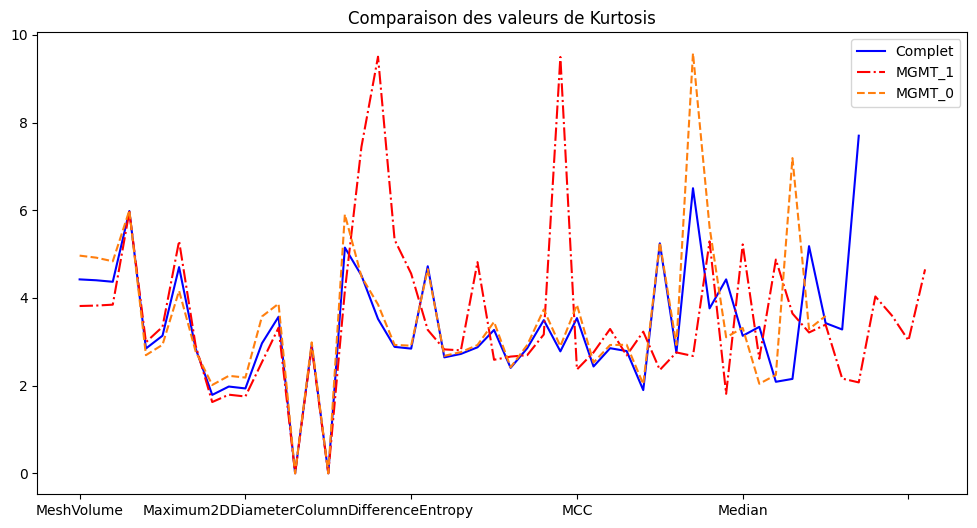

In [30]:
T_describe = describe.drop(['Kurtosis'],axis=1).T
T_MGMT_1  = describe_MGMT_1.drop(['Kurtosis','Maximum'],axis=1).T
T_MGMT_0  = describe_MGMT_0.drop(['Kurtosis','Maximum'],axis=1).T


#plt.plot(comparaisonNormalite.kurtosis.index, comparaisonNormalite.kurtosis.value)
#plt.show()
plt.figure(figsize=(12,6))
T_describe[T_describe['kurtosis']<10]['kurtosis'].plot(label='Complet',color='blue')
T_MGMT_1[T_MGMT_1['kurtosis']<10]['kurtosis'].plot(label='MGMT_1',color='red',linestyle='-.')
T_MGMT_0[T_MGMT_0['kurtosis']<10]['kurtosis'].plot(label='MGMT_0',color='tab:orange',linestyle='--')

plt.title('Comparaison des valeurs de Kurtosis')
plt.legend()
plt.show()

### ℹ️ **Note**:

Une première conclusion pourrait être qu'un gliocome dont la valeur du MGMT = 0 présenterait des variables contenant plus d'outliers.

Il y a des exceptions avec des variation semblant abbérantes comme l'excess de kurtosis pour la variable MajorAxisLength qui explose avec une augmentation de presque 1232%.

Ces variations pourrait indiquer les variables ayant un impact plus important par rapport à la valeur cible. Par Exemple kurtosis  à moins d'outliers avec MGMT_value à 1, une meilleur normalité d'Idn.

<h3>Exemple : comparaison de Range, Maximum afin de vérifier la normalité en fonction de la valeur cible car ces deux variables dans la classe 1 suivent une loi normale

Range pour MGMT_value=1


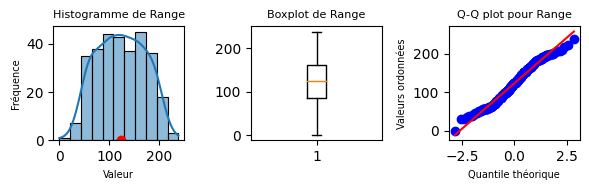

Range pour MGMT_value=0


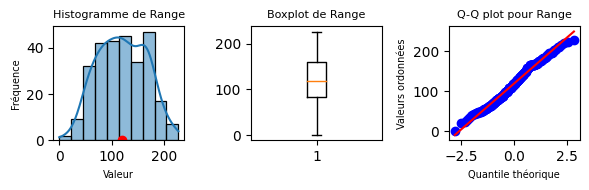

Maximum pour MGMT_value=1


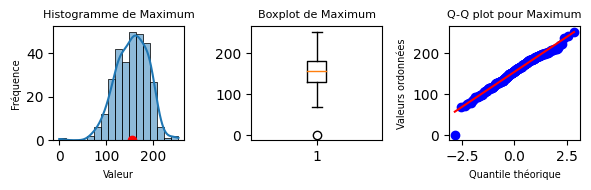

Maximum pour MGMT_value=0


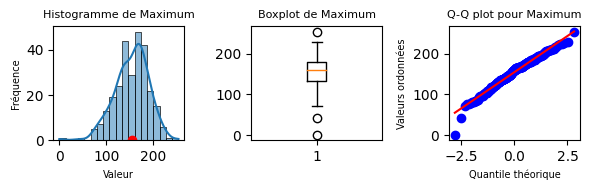

Uniformity pour MGMT_value=1


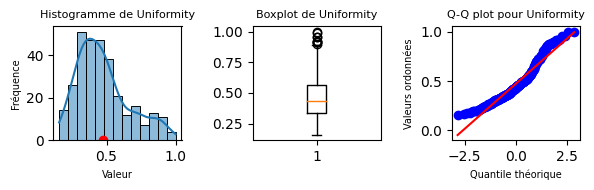

Uniformity pour MGMT_value=0


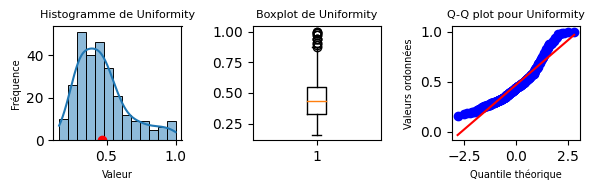

Uniformity
count                278.0
mean              0.466673
std               0.183655
min               0.156984
25%               0.327555
50%               0.436267
75%               0.547297
max                    1.0
skewness          0.993796
kurtosis          3.589401
excess_kurtosis   0.589401
shapiro_test           0.0
normalite              Non

In [31]:
print("Range pour MGMT_value=1")
show_test_normality(dataset[dataset.MGMT_value == 1][['Range']],graphic=True)      

print("Range pour MGMT_value=0")
show_test_normality(dataset[dataset.MGMT_value == 0][['Range']],graphic=True)   

print("Maximum pour MGMT_value=1")
show_test_normality(dataset[dataset.MGMT_value == 1][['Maximum']],graphic=True)      

print("Maximum pour MGMT_value=0")
show_test_normality(dataset[dataset.MGMT_value == 0][['Maximum']],graphic=True)  

print("Uniformity pour MGMT_value=1")
show_test_normality(dataset[dataset.MGMT_value == 1][['Uniformity']],graphic=True)      

print("Uniformity pour MGMT_value=0")
show_test_normality(dataset[dataset.MGMT_value == 0][['Uniformity']],graphic=True)

<h3>Détection des outliers</h3>
Utilisation du IQR (interquartile range)

# Faire un boxplot >

In [32]:
q1=dataset.quantile(0.25)
q3=dataset.quantile(0.75)

IQR=q3-q1

outliers = dataset[((dataset<(q1-1.5*IQR)) | (dataset>(q3+1.5*IQR)))]
outliers

outliers_removed = outliers.dropna().reset_index()
print(outliers_removed)

Empty DataFrame
Columns: [ID, MGMT_value, MeshVolume, VoxelVolume, SurfaceArea, SurfaceVolumeRatio, Sphericity, Compactness1, Compactness2, SphericalDisproportion, Maximum3DDiameter, Maximum2DDiameterRow, Maximum2DDiameterColumn, MajorAxisLength, MinorAxisLenth, LeastAxisLength, Elongation, Flatness, Autocorrelation, ClusterProminence, ClusterShade, ClusterTendency, Contrast, Correlation, DifferenceAverage, DifferenceEntropy, DifferenceVariance, Id, Idm, Idmn, Idn, Imc1, Imc2, InverseVariance, JointAverage, JointEnergy, JointEntropy, MCC, MaximumProbability, SumAverage, SumEntropy, SumSquares, 10Percentile, 90Percentile, Energy, Entropy, InterquartileRange, Kurtosis, Maximum, MeanAbsoluteDeviation, Mean, Median, Minimum, Range, RobustMeanAbsoluteDeviation, RootMeanSquared, Skewness, TotalEnergy, Uniformity, Variance]
Index: []


### ℹ️ **Note**: 
        
Aucune des variables ne répond au test de Shapiro-Wilk indiquant que les variables explicatives ne suivent pas une loi normale. Certaines variables ont un meilleur skewness avec un MGMT à 1 que par rapport au dataset global et inversement, ces mêmes variables sont donc sensibles au marqueurs. De même le Kurtosis est sensible aussi. Suivant les variables, la corrélation est positive ou négative entre skewness et kurtosis.
Une première conclusion pourrait être qu'un gliocome dont la valeur du MGMT = 0 présenterait des variables contenant plus d'outliers.


We want to study the variables that show a significant difference between a MGMT value of 1 and 0. In this part, we show the univariate and bivariate analyzes for such variables. Therefore, we use the significant values shown in part 6.1. In order to not create redundance in those analyzes, we use the group of correlation with a threshold of 0.7, as created in the part 7.2. If several significant variables are found in a group of correlation, we just use one of them and consider the others as duplicate. That will give us a clearer view in the bivariate analysis.

ValueError: Could not interpret value `MeshSurface` for parameter `x`

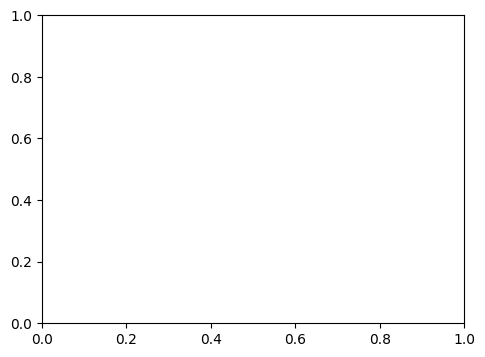

In [33]:
significant_vars_to_plot = []
vars_to_exclude = []
significant_values = ['MeshSurface', 'PixelSurface', 'Skewness', 'Uniformity', 'Perimeter', 'Sphericity', 'MaximumDiameter', 'SphericalDisproportion', 'MajorAxisLength', 'ClusterProminence', 'ClusterTendency', 'Correlation', 'Id', 'Idm', 'Idmn', 'Idn', 'Imc1', 'Imc2', 'JointEnergy', 'MCC', 'MaximumProbability', 'SumSquares', 'InterquartileRange', 'Kurtosis', 'Maximum', 'MeanAbsoluteDeviation', 'Range', 'RobustMeanAbsoluteDeviation', 'Variance']

for var in significant_values :
    if var not in vars_to_exclude :
        significant_vars_to_plot.append(var)
    
    for corr_vars in groups_correlated_threshold_07 :
        if var in corr_vars :
            for i in corr_vars :
                if i in significant_values :
                    vars_to_exclude.append(i)
                    
def fonc_test_normality(df, quantitative_var) : 
    fig = plt.figure(figsize=(12, 4))

    plt.subplot(1,2,1)
    sns.histplot(data=df, x=quantitative_var, kde=True, hue='MGMT_value')
    plt.title('Histogramme de '+quantitative_var,fontsize=8)
    plt.xlabel('Valeur',fontsize=7)
    plt.ylabel('Fréquence',fontsize=7)

    plt.subplot(1,2,2)
    sns.boxplot(data=df, y=quantitative_var, x='MGMT_value')
    plt.title('Boxplot de '+quantitative_var,fontsize=8)
    #plt.xlabel('Valeur')

    plt.show()
    
for var in significant_vars_to_plot :
    fonc_test_normality(dataset, var)

### ℹ️ **Note**: 
Even though the repartition of the values are generally quite similar, we can identify several differences between patients with different MGMT values.
Firstly, we can notice that the estimated density function has a greater maximum value for the patients with a MGMT value of 1 compared to the ones with a MGMT value of 0, except for the kurtosis variable. That is the most obvious for the Idmn variable, a measure of the local homogeneity of an image. Although, for the actual maxium value, it is not always the case.
It also seem that the estimated density function for the patients with a MGMT value of 1 almost always overlaps the 
one for for the patients with a MGMT value of 0.

## <a id='analysis_7_4'>7.4. Bivariate analysis</a>

We now want to realise a bivariate analysis of the significant values that we identified earlier.

In [ ]:
# TODO
# On se base sur l'une des variables quantitatives de chaque groupe retourné par la fonction find_highly_correlated_groups avec un seuil
# de 0.7 afin d'avoir une matrice lisible.

sns.pairplot(data=dataset[significant_vars_to_plot], diag_kind='kde')

In order to see the differences in the bivariate analysis between patients with a MGMT value of 1 and 0, we created a similar plot, but we separated the patients in two categories.

In [ ]:
#TODO
# Avec les mêmes colonnes que celles utilisée['MGMT_value']+significant_vars_to_plots pour le PairPlot, on réalise un Pair grid en séparant par couleur la variable explicative
bivariate_analysis_vars = ['MGMT_value']+significant_vars_to_plot

df_filtered = dataset[bivariate_analysis_vars]
#df_filtered['MGMT_value'] = df_filtered['MGMT_value'].apply(lambda x: "Oui" if x == 1 else "Non")

g = sns.PairGrid(df_filtered, hue='MGMT_value')
g.map(plt.scatter, alpha=.4)
g.add_legend();

### ℹ️ **Note**: 
There seem to be differences between the two values of MGMT, when we compare the two plots, and when we compare the repartition for the two kind of patients in the second matrix. Although, the multivariate analysis as it is displayed tend to show a lot of similarities rather than a real difference between the two kind of patients. Therefore, we have to go deeper and show each bivariate evolution in a more precise way.


In order to complete this analysis, we created several KDE plots, using the same variables as in the matrix above.

In [ ]:
#TODO
def create_kde_mgmt_pos_neg(df, x, y) : 
    """
    Displays 3 KDE plots that show the bivariate density using the columns x and y from a dataframe.

    Args:
        df: DataFrame, the dataframe whose 2 variables are going to be used for the KDE plot.
        x, y: String, the two columns
        
    """
    fig = plt.figure(figsize=(15, 3))
    fig.suptitle("Densité bivariée de "+y+" par rapport à "+x, fontsize=10)
    
    plt.subplot(1,3,1)
    sns.kdeplot(data=df, x=x, y=y, hue="MGMT_value")

    plt.subplot(1,3,2)
    plt.title("Densité bivariée pour MGMT positif", fontsize = 6)
    sns.kdeplot(data=df[df["MGMT_value"] == 1], x=x, y=y, color="orange")

    plt.subplot(1,3,3)
    plt.title("Densité bivariée pour MGMT négatif", fontsize = 6)
    sns.kdeplot(data=df[df["MGMT_value"] == 0], x=x, y=y)
    plt.show();

    
significant_values_combinations = []

for combination in itertools.combinations(significant_vars_to_plot, 2):
    significant_values_combinations.append(combination)

significant_values_combinations

for combination in significant_values_combinations :
    create_kde_mgmt_pos_neg(dataset, combination[0], combination[1])

### ℹ️ **Note**: 
We can notice that for each bivariate density of each combination, there is an important similarity whatever the MGMT value is. However, it seems that the interquartile range is almost systematicaly separated into two areas with patients with a MGMT value of 1, but not for the other, or in a less important scale, whatever the other variable is.

That seems to be an interesting information for the identification of patients with a MGMT value of 1. Indeed, in the univariate analysis, we can see that the estimated density function for the variable interquartile range has two local maximums for the patients with a  MGMT value of 1, but not for the ones with a MGMT value of 0. The multivariate analysis shows us that this local maximum is not a result of the evolution of another variable.

Justlike in the univariate analysis, the density shown in orange, representing the patients with a MGMT value of 1, overlaps the one of the patients MGMT value of 0. Especially around the mean values, for Idmn and Maximum for instance.

# <a id='clean_preprocessing_8'>8. Clean & Preprocessing</a>

# TODO 🚧

In [ ]:
#TODO

In [ ]:
#TODO

In [ ]:
#TODO

# 9. Prediction

# 🚧 TODO TEST

In [34]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
from sklearn_pandas import gen_features, DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

### Copy

In [35]:
dataset_copy = dataset.copy() 

### Cleaning


* ['MeshSurface', 'PixelSurface']
* ['SumSquares', 'ClusterTendency']
* ['DifferenceVariance', 'Contrast']
* ['DifferenceAverage', 'Id', 'Idm']
* ['SumAverage', 'JointAverage']
* ['SumEntropy', 'JointEntropy']
* ['TotalEnergy', 'Energy']


* ['MeshSurface', 'PixelSurface']
* ['MinorAxisLenth', 'SphericalDisproportion']
* ['JointAverage', 'SumAverage', 'Autocorrelation']
* ['SumSquares', 'MeanAbsoluteDeviation', 'ClusterTendency', 'RobustMeanAbsoluteDeviation', 'Variance']
* ['Contrast', 'DifferenceAverage', ' 'Median'', 'DifferenceVariance', 'Id', 'Idm', 'InverseVariance']
* ['SumEntropy', 'Entropy', 'Uniformity', 'JointEnergy', 'JointEntropy', 'MaximumProbability']
* ['RootMeanSquared', '90Percentile']
* ['TotalEnergy', 'Energy']
* ['Mean', 'Median']

In [36]:
# Drop correlation at 0.99
dataset_copy = dataset_copy.drop([
    "SumEntropy", 
    "SumAverage", 
    "SumSquares",
    "DifferenceAverage", 
    "DifferenceEntropy",
    "Variance",
    "DifferenceVariance", 
    "JointEntropy",
    "JointAverage",
    "JointEnergy",
    "InverseVariance",
    "TotalEnergy",
    "Id", 
    "Idm",
    "Uniformity",
    "MaximumProbability",
    "Mean",
    "Median",
    "MeanAbsoluteDeviation",
    "MinorAxisLenth",
    "RobustMeanAbsoluteDeviation",
    "SumSquares", 
    "PixelSurface", 
    "MinorAxisLenth", 
    "90Percentile"
], axis=1)


KeyError: "['PixelSurface'] not found in axis"

### Features & Targets

In [ ]:
target = dataset_copy["MGMT_value"]
features = dataset_copy.drop("MGMT_value", axis=1)

In [ ]:
features.head()

In [ ]:
target.head()

### Split into train and test

In [ ]:
# Split the data into train and test sets, preserving class balance in the test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

## Pipeline

In [ ]:
pipeline_steps = []

### Preprocessing

In [ ]:
from sklearn.preprocessing import RobustScaler

#-------------------------------#
# Name
#-------------------------------#
preprocessing_name = "preprocessing"

#-------------------------------#
# Transformers
#-------------------------------#

transformer_scaler = RobustScaler()

# If need apply special collumns
#preprocessing = ColumnTransformer(
#    transformers=[
#        ('scaler', transformer_scaler, ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 'fico_range_high', 'open_acc', 'total_pymnt', 'acc_now_delinq', 'total_bal_ex_mort', 'total_bc_limit'])
#    ]
#)

#-------------------------------#
# Pipeline first step
#-------------------------------#
pipeline_steps.append((preprocessing_name, transformer_scaler))


### Model

In [ ]:
#-------------------------------#
# Name
#-------------------------------#
model_name = "model"

#-------------------------------#
# Model
#-------------------------------#
#from sklearn.neighbors import KNeighborsClassifier

#model = KNeighborsClassifier()

#from sklearn.tree import DecisionTreeClassifier

#model = DecisionTreeClassifier()

#from sklearn.svm import SVC
# {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'} 0.5408373369938229
#model = SVC()

# DBSCAN
#from sklearn.cluster import DBSCAN
#model = DBSCAN()

# KMeans
#model = DBSCAN()

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#-------------------------------#
# Pipeline second step
#-------------------------------#
pipeline_steps.append((model_name, model))

### Pipeline

In [ ]:
pipeline = Pipeline(steps=pipeline_steps)

## Hyperparameter tuning, cross-validation, optimization

In [ ]:
# Define the parameter grid for GridSearchCV
#param_grid = {
#    'model__nu': [0.1, 0.2, 0.3],  # Values to try for the 'nu' parameter
#    'model__gamma': [0.1, 0.2, 0.3]  # Values to try for the 'gamma' parameter, if applicable
#}

# KNeighborsClassifier
#param_grid = {
#    f'{model_name}__n_neighbors': list(range(1, 220)),  # Valeurs possibles pour le nombre de voisins
#    f'{model_name}__weights': ['uniform', 'distance']  # Valeurs possibles pour les poids
#}

# DecisionTreeClassifier
#param_grid = {
#    f'{model_name}__criterion': ['gini', 'entropy'],  # Critère pour mesurer la qualité des splits
#    f'{model_name}__max_depth': [None, 5, 10],  # Profondeur maximale de l'arbre
#    f'{model_name}__min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons requis pour effectuer un split
#    f'{model_name}__min_samples_leaf': [1, 2, 3],  # Nombre minimal d'échantillons requis dans une feuille
#    f'{model_name}__max_features': ['auto', 'sqrt', 'log2'],  # Nombre maximal de caractéristiques à considérer pour chaque split
#    f'{model_name}__min_impurity_decrease': [0.0, 0.1, 0.2],  # Seuil minimal pour effectuer un split basé sur l'impureté
#}

# SVC
#param_grid = {
#    f'{model_name}__C': [0.1, 1.0, 10.0],  # Paramètre de régularisation C
#    f'{model_name}__kernel': ['linear', 'rbf'],  # Noyau du modèle SVC
#    f'{model_name}__gamma': ['scale', 'auto']  # Paramètre gamma pour les noyaux rbf et poly
#}


#RandomForestClassifier
param_grid = {
    f"{model_name}__criterion": ["gini", "entropy"],
    f"{model_name}__n_estimators":  list(range(5, 500)),  # Nombre d'estimateurs dans le RandomForestClassifier
    f"{model_name}__max_depth":  list(range(1, 51)),  # Profondeur maximale des arbres dans le RandomForestClassifier
    f"{model_name}__min_samples_split": [2, 5, 10]  # Nombre minimal d'échantillons requis pour effectuer un split
}



### Search Hyperparame

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, error_score='raise')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

### Score

In [ ]:
# Get the best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)



### Predict


In [ ]:
#from sklearn.metrics import classification_report

## TODO SEGMENTATION JEUX POUR FAIRE PREDICTION

# Evaluate the predictions
#accuracy = accuracy_score(y_test, target)
#print("Accuracy:", accuracy)

# Use the best model for predictions
#best_model = grid_search.best_estimator_
#predictions = best_model.predict(X_test)

# Evaluate the predictions
#print(classification_report(y_test, predictions))
